In [4]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [798]:
df = pd.read_csv("car.csv")
# 观察数据
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [800]:
# 总览数据概况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16733 entries, 0 to 16732
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              16733 non-null  object
 1   Year               16733 non-null  int64 
 2   Model              16733 non-null  object
 3   Car/Suv            16706 non-null  object
 4   Title              16733 non-null  object
 5   UsedOrNew          16733 non-null  object
 6   Transmission       16733 non-null  object
 7   Engine             16733 non-null  object
 8   DriveType          16733 non-null  object
 9   FuelType           16733 non-null  object
 10  FuelConsumption    16733 non-null  object
 11  Kilometres         16733 non-null  object
 12  ColourExtInt       16733 non-null  object
 13  Location           16284 non-null  object
 14  CylindersinEngine  16733 non-null  object
 15  BodyType           16452 non-null  object
 16  Doors              15130 non-null  objec

Price                   2
Car/Suv                27
Kilometres            142
Transmission          251
BodyType              281
Location              449
FuelType              637
Doors                1603
Engine               1674
CylindersinEngine    1674
FuelConsumption      1697
Seats                1704
dtype: int64

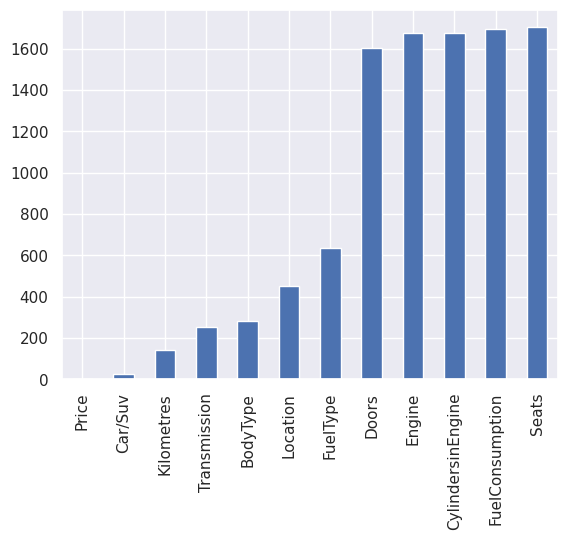

In [801]:
# 判断缺失值和异常值
# 缺失值
# '-' 用 nan 替换
df.replace('-', np.nan, inplace=True)
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
missing

<Axes: >

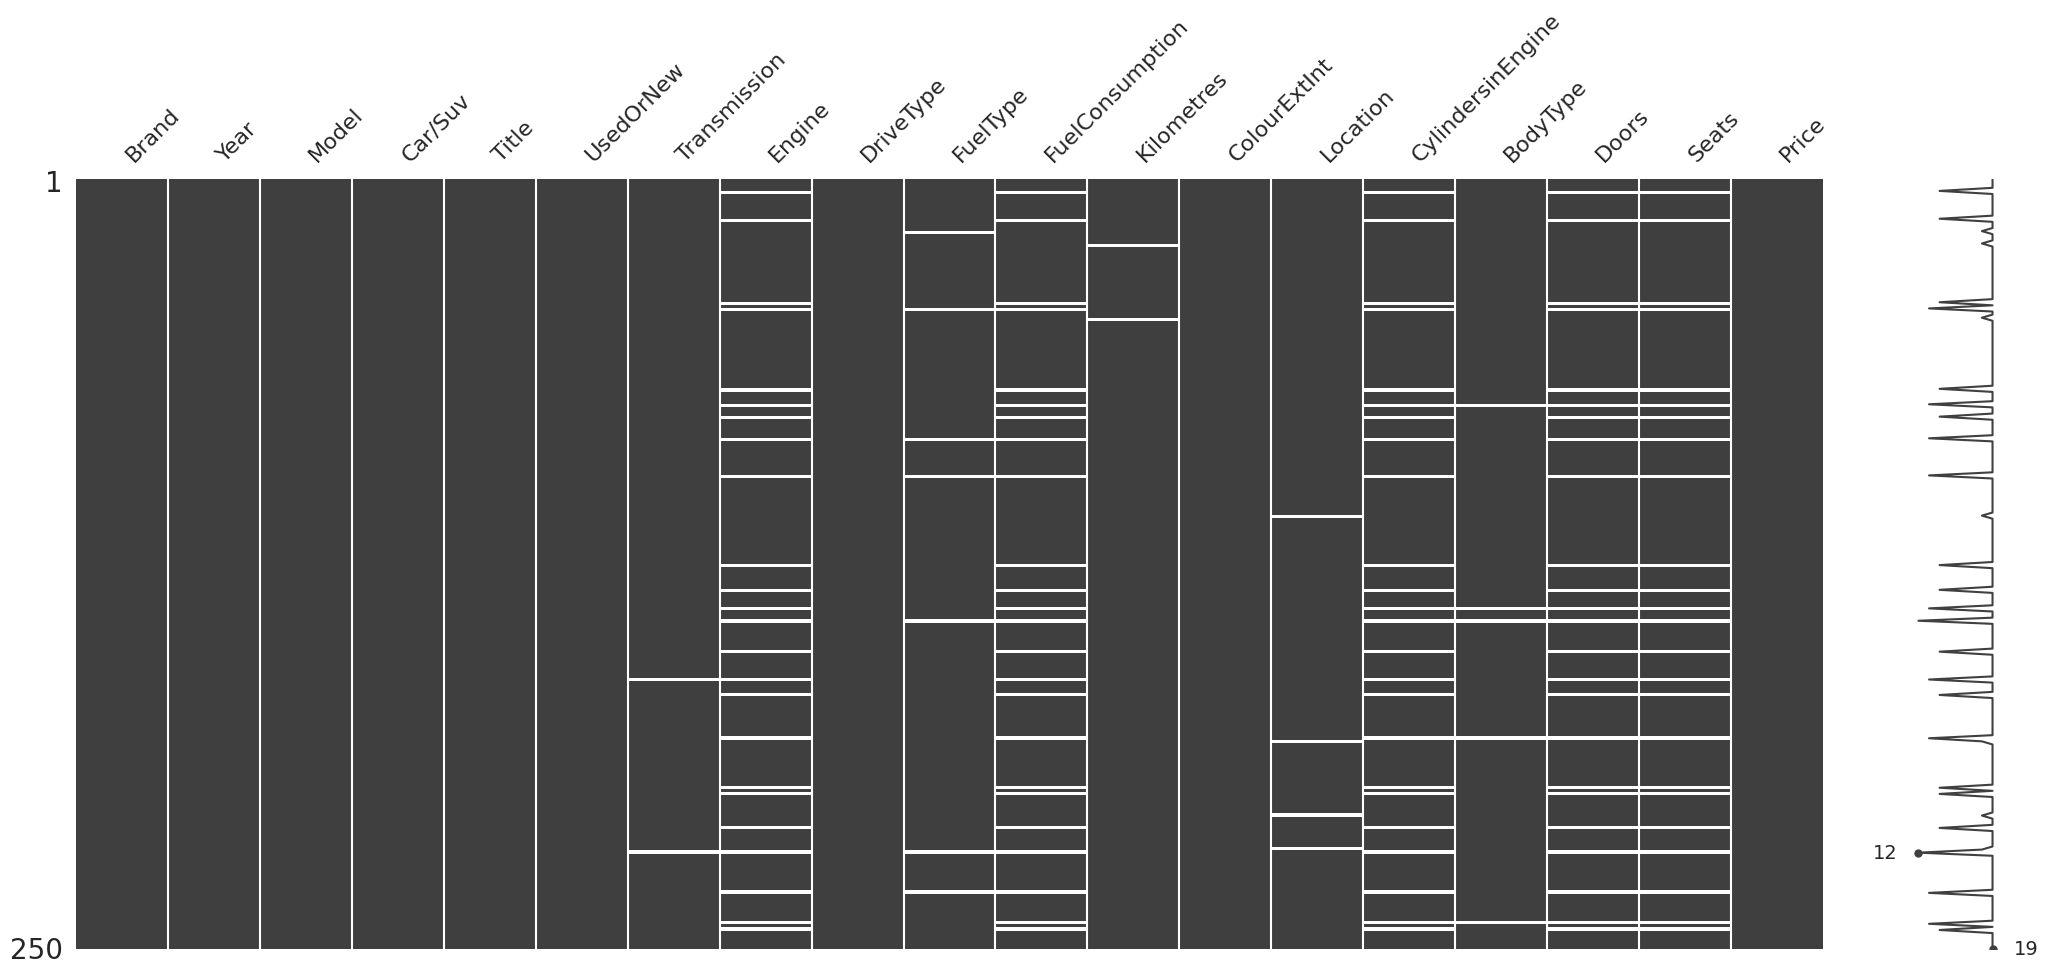

In [802]:
# 可视化缺失值
msno.matrix(df.sample(250))

<Axes: >

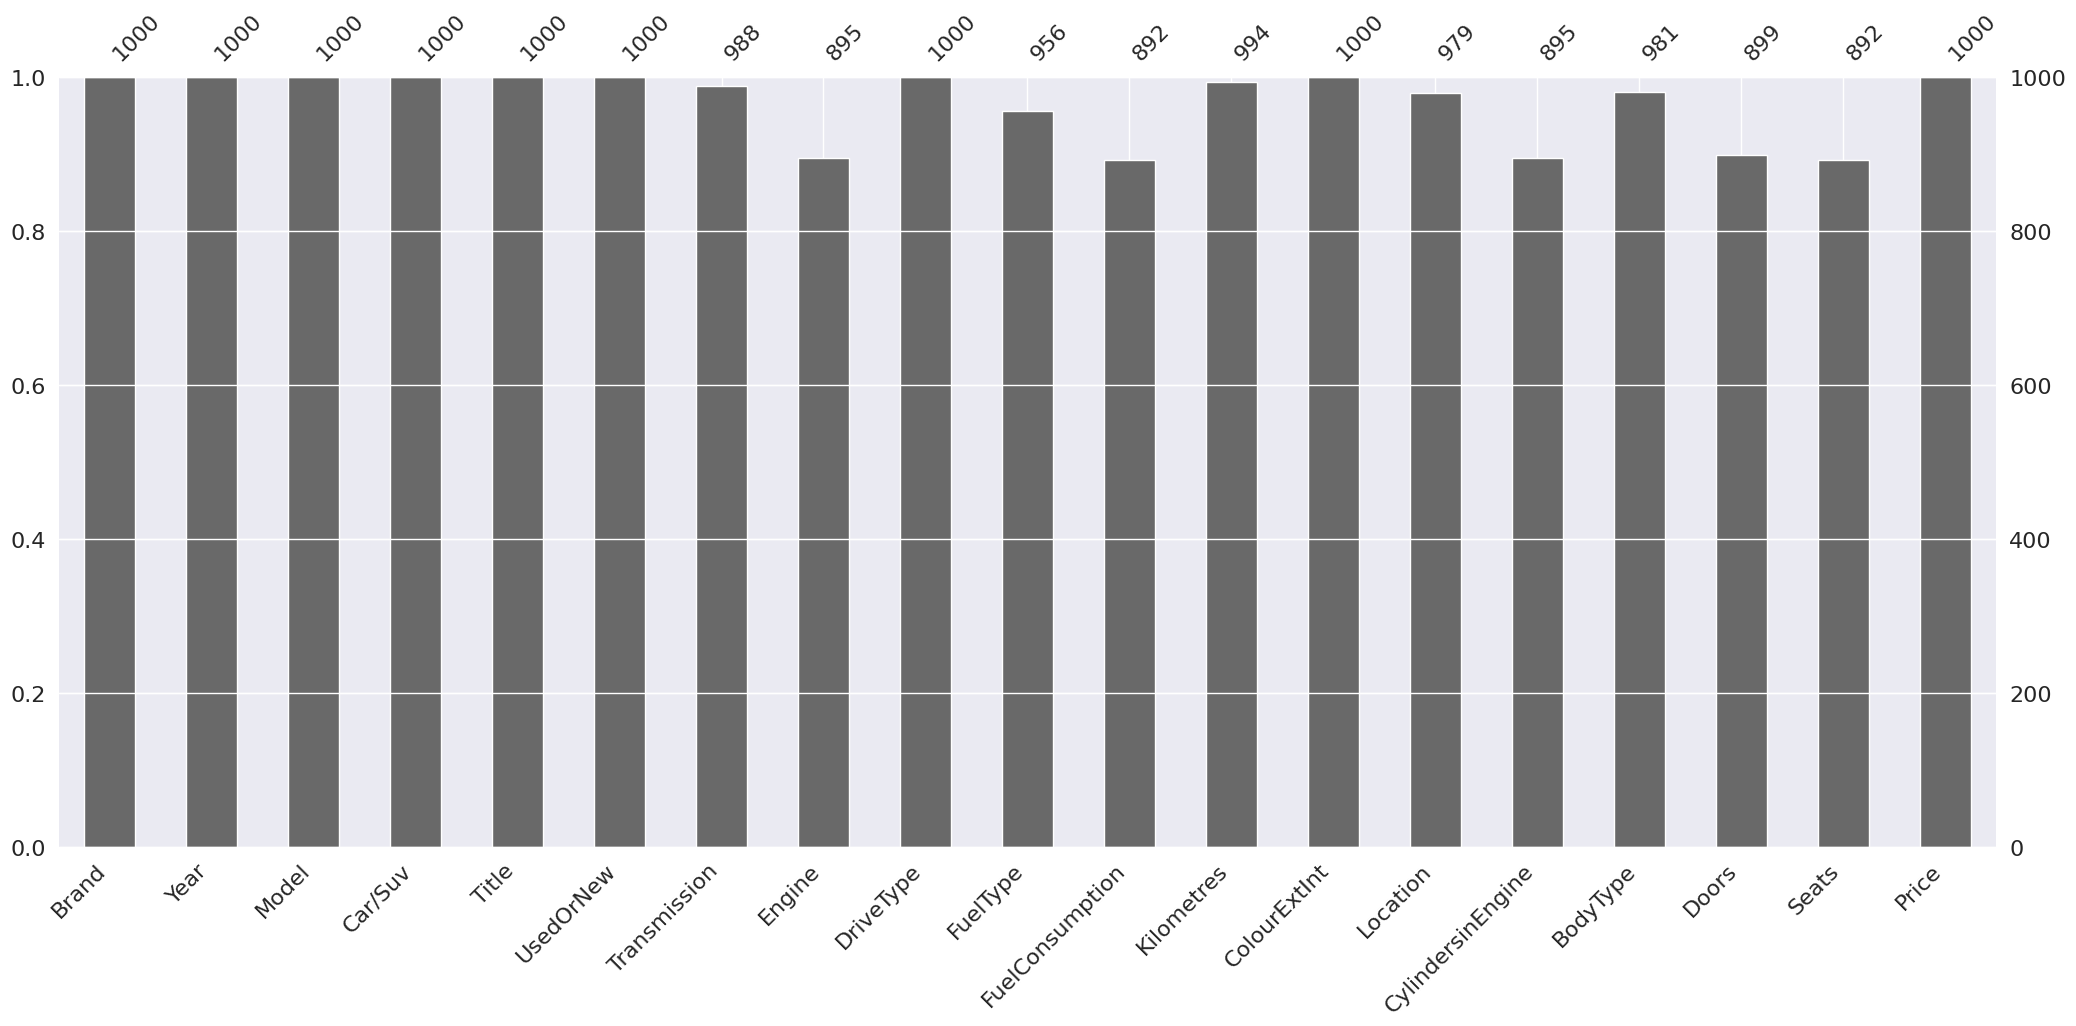

In [803]:
msno.bar(df.sample(1000))

In [804]:
# 异常值
# 查看异常值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16733 entries, 0 to 16732
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              16733 non-null  object
 1   Year               16733 non-null  int64 
 2   Model              16733 non-null  object
 3   Car/Suv            16706 non-null  object
 4   Title              16733 non-null  object
 5   UsedOrNew          16733 non-null  object
 6   Transmission       16482 non-null  object
 7   Engine             15059 non-null  object
 8   DriveType          16733 non-null  object
 9   FuelType           16096 non-null  object
 10  FuelConsumption    15036 non-null  object
 11  Kilometres         16591 non-null  object
 12  ColourExtInt       16733 non-null  object
 13  Location           16284 non-null  object
 14  CylindersinEngine  15059 non-null  object
 15  BodyType           16452 non-null  object
 16  Doors              15130 non-null  objec

> 除 `Year` 外，均为 `object` 类型，均需单独处理

In [805]:
# 汽车制造商
df.Brand.value_counts()

Brand
Toyota         2784
Hyundai        1239
Mazda          1179
Holden         1087
Ford           1055
               ... 
Proton            1
Daewoo            1
Hummer            1
Rolls-Royce       1
Packard           1
Name: count, Length: 76, dtype: int64

In [806]:
# 汽车型号
df.Model.value_counts()

Model
Hilux          430
Corolla        405
Ranger         398
Landcruiser    370
I30            366
              ... 
Celerio          1
R-Class          1
Vectra           1
ES300            1
120              1
Name: count, Length: 781, dtype: int64

In [807]:
# 汽车类型
df['Car/Suv'].value_counts()

Car/Suv
SUV                             5921
Hatchback                       2365
Ute / Tray                      2068
Sedan                           1898
Wagon                            577
                                ... 
Werribee Hyundai                   1
Bay City Holden Used.              1
Auto Mega Warehouse Brisbane       1
Consign-A-Car P/L (Kedron)         1
Australian Vehicle Locators        1
Name: count, Length: 619, dtype: int64

In [808]:
# 汽车标题或描述
df['Title'].value_counts()

Title
2019 Hyundai I30 Active                         60
2020 Kia Cerato S                               52
2020 Hyundai Kona Active (fwd)                  38
2020 Hyundai I30 Active                         35
2021 Toyota Corolla Ascent Sport Hybrid         28
                                                ..
2016 Porsche Cayenne Diesel Platinum Edition     1
2014 Ford Falcon XR6                             1
2011 Toyota Kluger KX-S (4X4)                    1
2020 Toyota C-HR Koba                            1
2021 Mercedes-Benz C200                          1
Name: count, Length: 8804, dtype: int64

In [809]:
# 汽车状况：新车/二手车
df.UsedOrNew.value_counts()

UsedOrNew
USED    14994
NEW      1227
DEMO      512
Name: count, dtype: int64

In [810]:
# 变速器类型
df.Transmission.value_counts()

Transmission
Automatic    14530
Manual        1952
Name: count, dtype: int64

In [811]:
df.Engine.value_counts()

Engine
4 cyl, 2 L       3950
4 cyl, 2.5 L     1635
4 cyl, 2.4 L      830
6 cyl, 3 L        712
4 cyl, 1.8 L      704
                 ... 
12 cyl, 5.7 L       1
12 cyl, 6.3 L       1
4 cyl               1
8 cyl, 6.1 L        1
10 cyl, 5.2 L       1
Name: count, Length: 105, dtype: int64

In [812]:
# 发动机容量
# 由于发动机气缸数已经存放于 CylindersinEngine 中，因此只需提取容量 (L)
df['Engine'] = df.Engine.str.extract("(\d+\.*\d*) L", expand=False).astype("float64")

In [813]:
# 驱动类型
df.DriveType.value_counts()

DriveType
Front    6978
4WD      3143
AWD      3113
Rear     2350
Other    1149
Name: count, dtype: int64

In [814]:
# 燃油类型
df.FuelType.value_counts()

FuelType
Unleaded    6985
Diesel      4905
Premium     3377
Hybrid       652
Electric     115
Other         42
LPG           15
Leaded         5
Name: count, dtype: int64

In [815]:
# 油耗
# 提取每百公里油耗(L/100km)
df["FuelConsumption"] = df.FuelConsumption.str.extract(
    "(\d+\.*\d*) L", expand=False
).astype("float64")
df.FuelConsumption.value_counts()

FuelConsumption
7.4     710
7.9     518
7.3     477
8.1     443
7.6     404
       ... 
20.7      1
18.3      1
17.4      1
19.1      1
15.8      1
Name: count, Length: 156, dtype: int64

In [816]:
# 行驶里程
df.Kilometres.value_counts()

Kilometres
- / -     449
10        130
15         97
20         83
7          59
         ... 
93518       1
169360      1
95734       1
37041       1
31852       1
Name: count, Length: 14261, dtype: int64

In [817]:
df[df.Kilometres == "- / -"].head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
14764,Renault,2023,Arkana,NEW Available to order,2023 Renault Arkana ZEN,NEW,Automatic,1.3,Front,NaN,6.0,- / -,5 years / Unlimited km,NaN,4 cyl,SUV,4 Doors,5 Seats,37500
14766,Toyota,2023,HiAce,NEW Available to order,2023 Toyota HiAce Slwb Commuter (12 Seats),NEW,Automatic,2.8,Rear,Diesel,0.0,- / -,5 years / Unlimited km,NaN,4 cyl,People Mover,3 Doors,12 Seats,69760
14768,Land,2023,Rover,NEW Available to order,2023 Land Rover Defender 90 D250 S (183KW),NEW,Automatic,3.0,AWD,Diesel,7.9,- / -,5 years / Unlimited km,NaN,6 cyl,SUV,3 Doors,5 Seats,97700
14770,Mazda,2023,6,NEW Available to order,2023 Mazda 6 G25 Sport,NEW,Automatic,2.5,Front,Unleaded,7.0,- / -,5 years / Unlimited km,NaN,4 cyl,Wagon,4 Doors,5 Seats,36840
14772,Land,2023,Rover,NEW Available to order,2023 Land Rover Defender 130 P500 V8 (368KW),NEW,Automatic,5.0,AWD,NaN,12.7,- / -,5 years / Unlimited km,NaN,8 cyl,SUV,5 Doors,8 Seats,237900


In [818]:
# '- / -' 为新车，用 0 替换
df.Kilometres.replace("- / -", 0, inplace=True)
# 将行驶里程未知的二手车抛弃
drop_rows = df[df.Kilometres.isnull()][df[df.Kilometres.isnull()].UsedOrNew == "USED"]
df.drop(drop_rows.index, inplace=True)
# 将行驶里程未知的新车的行驶里程用 0 替换
df.Kilometres.fillna(0, inplace=True)
df['Kilometres'] = df.Kilometres.astype("int64")
df.Kilometres.value_counts()

Kilometres
0         579
10        130
15         97
20         83
7          59
         ... 
93518       1
169360      1
95734       1
37041       1
31852       1
Name: count, Length: 14261, dtype: int64

In [819]:
# 汽车颜色
df.ColourExtInt.value_counts()

ColourExtInt
White / -               2845
White / Black           1701
Silver / -              1117
Grey / -                 939
Black / -                905
                        ... 
Green / Black & Grey       1
- / 44Lb20                 1
Blue / 74La20              1
White / 2015/05            1
Red / Blue/Black           1
Name: count, Length: 834, dtype: int64

In [820]:
# 汽车位置
df.Location.value_counts()

Location
Minchinbury, NSW          544
Blacktown, NSW            295
Liverpool, NSW            253
Hoppers Crossing, VIC     227
Ringwood, VIC             215
                         ... 
West Lakes, SA              1
Eight Mile Plains, QLD      1
Goodwood, SA                1
Mudgeeraba, QLD             1
East Toowoomba, QLD         1
Name: count, Length: 618, dtype: int64

In [821]:
# 气缸数量
# df.CylindersinEngine.isnull().sum() =  1669
# 数据提取
df["CylindersinEngine"] = df.CylindersinEngine.str.replace(" cyl", "")
df["CylindersinEngine"] = df["CylindersinEngine"].str.strip()
df["CylindersinEngine"] = df.CylindersinEngine.str.replace(" L", "")
df['CylindersinEngine'] = df.CylindersinEngine.astype("float64")
df.CylindersinEngine.value_counts()

CylindersinEngine
4.0     11502
6.0      2086
8.0       605
5.0       399
3.0       330
0.0       106
12.0       16
2.0         5
10.0        3
Name: count, dtype: int64

In [822]:
df.BodyType.value_counts()

BodyType
SUV             6902
Hatchback       2696
Ute / Tray      2512
Sedan           1982
Wagon           1231
Commercial       608
Coupe            336
Convertible      131
Other             23
People Mover      21
Name: count, dtype: int64

In [823]:
df.Doors.value_counts()

Doors
 4 Doors     11184
 5 Doors      2533
 2 Doors      1122
 3 Doors       213
 5 Seats        21
 2 Seats        10
 6 Seats         9
 7 Seats         8
 8 Seats         8
 3 Seats         6
 9 Seats         4
 4 Seats         3
 12 Seats        1
Name: count, dtype: int64

In [824]:
# Seats 错位至 Doors 列，将 Seats 数据提取出来
df["Seats"] = np.where(df["Doors"].str.contains("Seats"), df["Doors"], df["Seats"])
df["Doors"] = np.where(df["Doors"].str.contains("Seats"), np.nan, df["Doors"])
df["Doors"] = df.Doors.str.replace(" Doors", "")
df['Doors'] = df.Doors.astype("float64")
df.Doors.value_counts()

Doors
4.0    11184
5.0     2533
2.0     1122
3.0      213
Name: count, dtype: int64

In [825]:
df["Seats"] = df.Seats.str.replace(" Seats", "")
df['Seats'] = df.Seats.astype("float64")
df.Seats.value_counts()

Seats
5.0     11329
7.0      1799
4.0       679
2.0       604
3.0       333
8.0       279
6.0        39
14.0       12
9.0         7
12.0        5
11.0        3
22.0        2
15.0        1
Name: count, dtype: int64

In [826]:
# 抛弃价格未知的行
df.drop(df[df.Price.isnull()].index, inplace=True)
# 抛弃 `Price` 为 `POA` 的行 (Price On Application: 根据申请报价)
df.drop(df[df.Price == "POA"].index, inplace=True)
df['Price'] = df.Price.astype("float64")

In [827]:
df.shape

(16672, 19)

In [828]:
df.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                26
Title                   0
UsedOrNew               0
Transmission          243
Engine               1656
DriveType               0
FuelType              632
FuelConsumption      1678
Kilometres              0
ColourExtInt            0
Location              449
CylindersinEngine    1655
BodyType              278
Doors                1655
Seats                1615
Price                   0
dtype: int64

In [829]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16672 entries, 0 to 16732
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16672 non-null  object 
 1   Year               16672 non-null  int64  
 2   Model              16672 non-null  object 
 3   Car/Suv            16646 non-null  object 
 4   Title              16672 non-null  object 
 5   UsedOrNew          16672 non-null  object 
 6   Transmission       16429 non-null  object 
 7   Engine             15016 non-null  float64
 8   DriveType          16672 non-null  object 
 9   FuelType           16040 non-null  object 
 10  FuelConsumption    14994 non-null  float64
 11  Kilometres         16672 non-null  int64  
 12  ColourExtInt       16672 non-null  object 
 13  Location           16223 non-null  object 
 14  CylindersinEngine  15017 non-null  float64
 15  BodyType           16394 non-null  object 
 16  Doors              15017 no

<Axes: title={'center': 'Log Normal'}, xlabel='Price'>

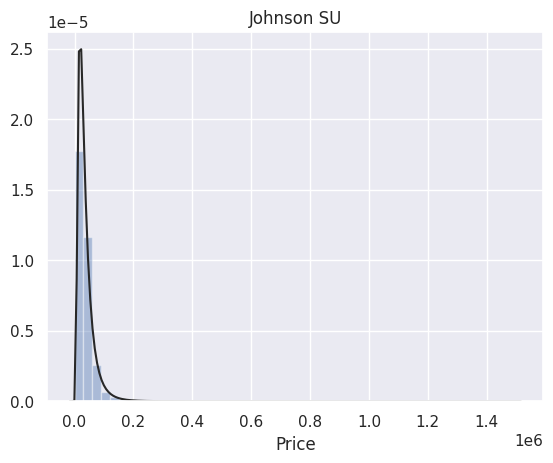

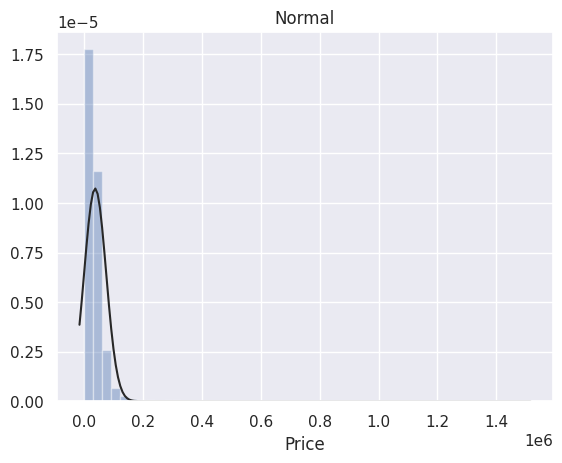

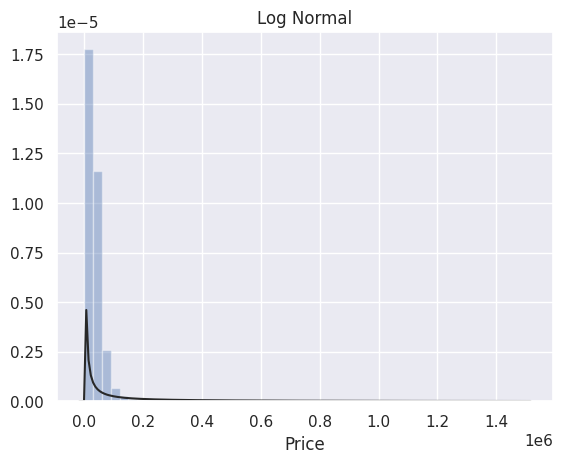

In [830]:
# 价格总体分布
import scipy.stats as st

y = df["Price"]
plt.figure(1)
plt.title("Johnson SU")
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title("Normal")
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3)
plt.title("Log Normal")
sns.distplot(y, kde=False, fit=st.lognorm)

> 价格不服从正态分布，最佳拟合为无界约翰分布

Skewness: 8.660975
Kurtosis: 190.370450


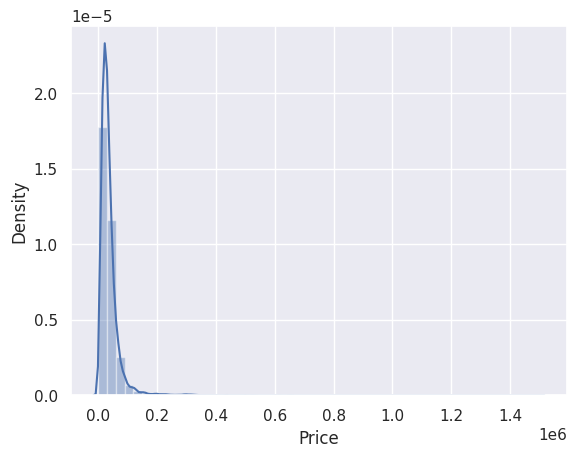

In [831]:
sns.distplot(df["Price"])
print("Skewness: %f" % df["Price"].skew())
print("Kurtosis: %f" % df["Price"].kurt())

1. Skewness
    - 偏度是描述数据分布形状的统计量，其值为正表示数据分布偏向右侧（正偏），而其值为负表示数据分布偏向左侧（负偏）。在这里，偏度值为8.660975，表明价格数据呈现明显的正偏分布。
2. Kurtosis
    - 峰度是描述数据分布尾部形状的统计量。正常的峰度值为3，大于3表示尾部较重，小于3表示尾部较轻。在这里，峰度值为190.370450，表明价格数据的分布尾部相当重，可能存在异常值或者极端的价格数据点。

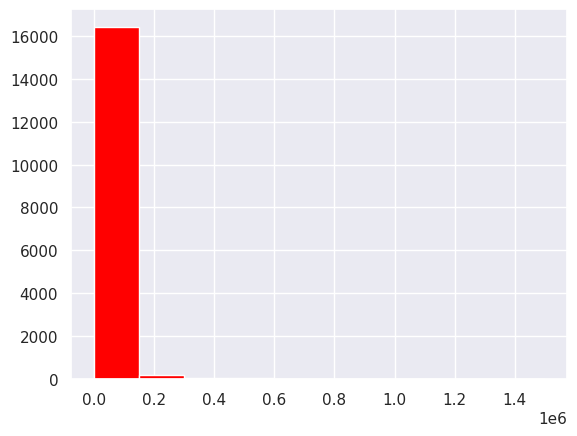

In [832]:
plt.hist(df["Price"], orientation="vertical", histtype="bar", color="red")
plt.show()

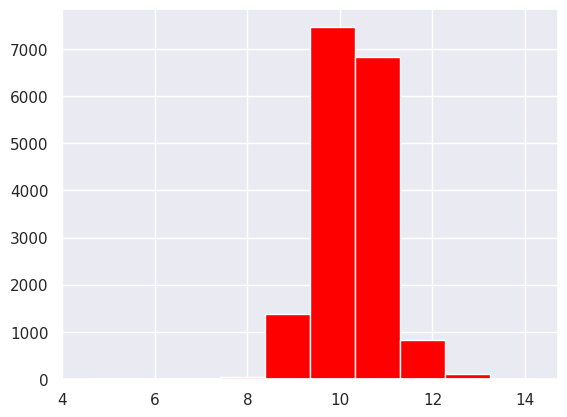

In [833]:
# log变换之后的分布较均匀，进行log变换进行预测
plt.hist(
    np.log(df["Price"]), orientation="vertical", histtype="bar", color="red"
)
plt.show()

In [834]:
# 数字特征
numeric_features = df.select_dtypes(include=[np.int64, np.float64])
numeric_features.columns

Index(['Year', 'Engine', 'FuelConsumption', 'Kilometres', 'CylindersinEngine',
       'Doors', 'Seats', 'Price'],
      dtype='object')

In [835]:
# 类型特征
categorical_features = df.select_dtypes(include=[object])
categorical_features.fillna("Missing", inplace=True)
categorical_features = categorical_features.astype("category")
df[categorical_features.columns] = categorical_features
categorical_features.columns

Index(['Brand', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission',
       'DriveType', 'FuelType', 'ColourExtInt', 'Location', 'BodyType'],
      dtype='object')

In [836]:
# 数字特征相关性分析
corr = numeric_features.corr()
corr["Price"].sort_values(ascending=False)

Price                1.000000
Year                 0.352912
CylindersinEngine    0.320729
Engine               0.287123
FuelConsumption      0.024685
Seats               -0.045206
Doors               -0.197698
Kilometres          -0.396804
Name: Price, dtype: float64

<Axes: title={'center': 'Correlation of Numeric Features with Price'}>

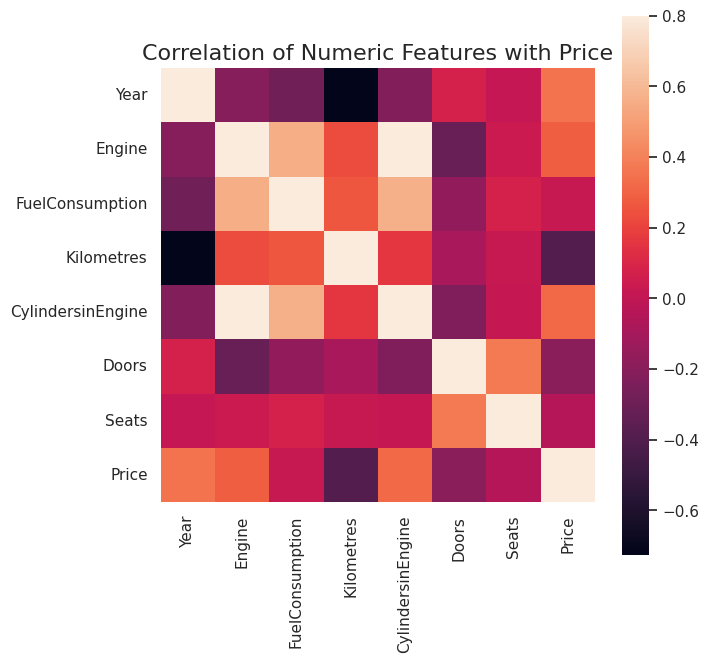

In [837]:
f, ax = plt.subplots(figsize=(7, 7))
plt.title("Correlation of Numeric Features with Price", y=1, size=16)
sns.heatmap(corr, square=True, vmax=0.8)

In [838]:
# 查看数字特征的峰值和偏度

for col in numeric_features:
    print(
        "{:20}".format(col),
        "Skewness: {:05.2f}".format(df[col].skew()),
        "   ",
        "Kurtosis: {:05.2f}".format(df[col].kurt()),
    )

Year                 Skewness: -1.37     Kurtosis: 05.79
Engine               Skewness: 01.62     Kurtosis: 05.34
FuelConsumption      Skewness: -0.10     Kurtosis: 03.35
Kilometres           Skewness: 00.97     Kurtosis: 00.99
CylindersinEngine    Skewness: 01.52     Kurtosis: 05.83
Doors                Skewness: -1.35     Kurtosis: 02.99
Seats                Skewness: 00.87     Kurtosis: 12.27
Price                Skewness: 08.66     Kurtosis: 190.37


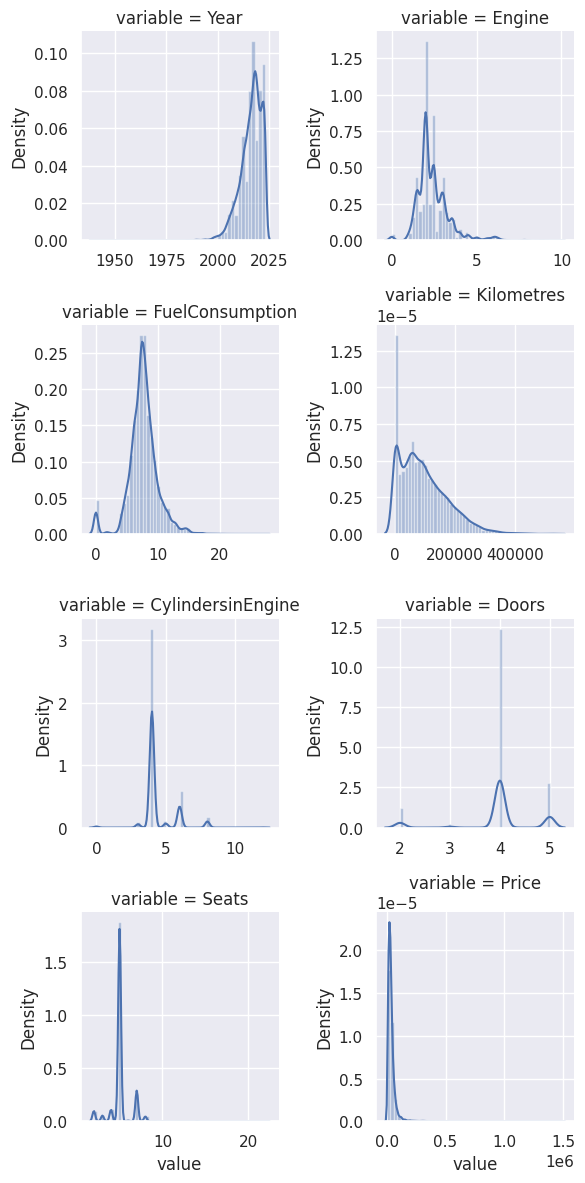

In [839]:
# 数字特征分布
f = pd.melt(df, value_vars=numeric_features.columns)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

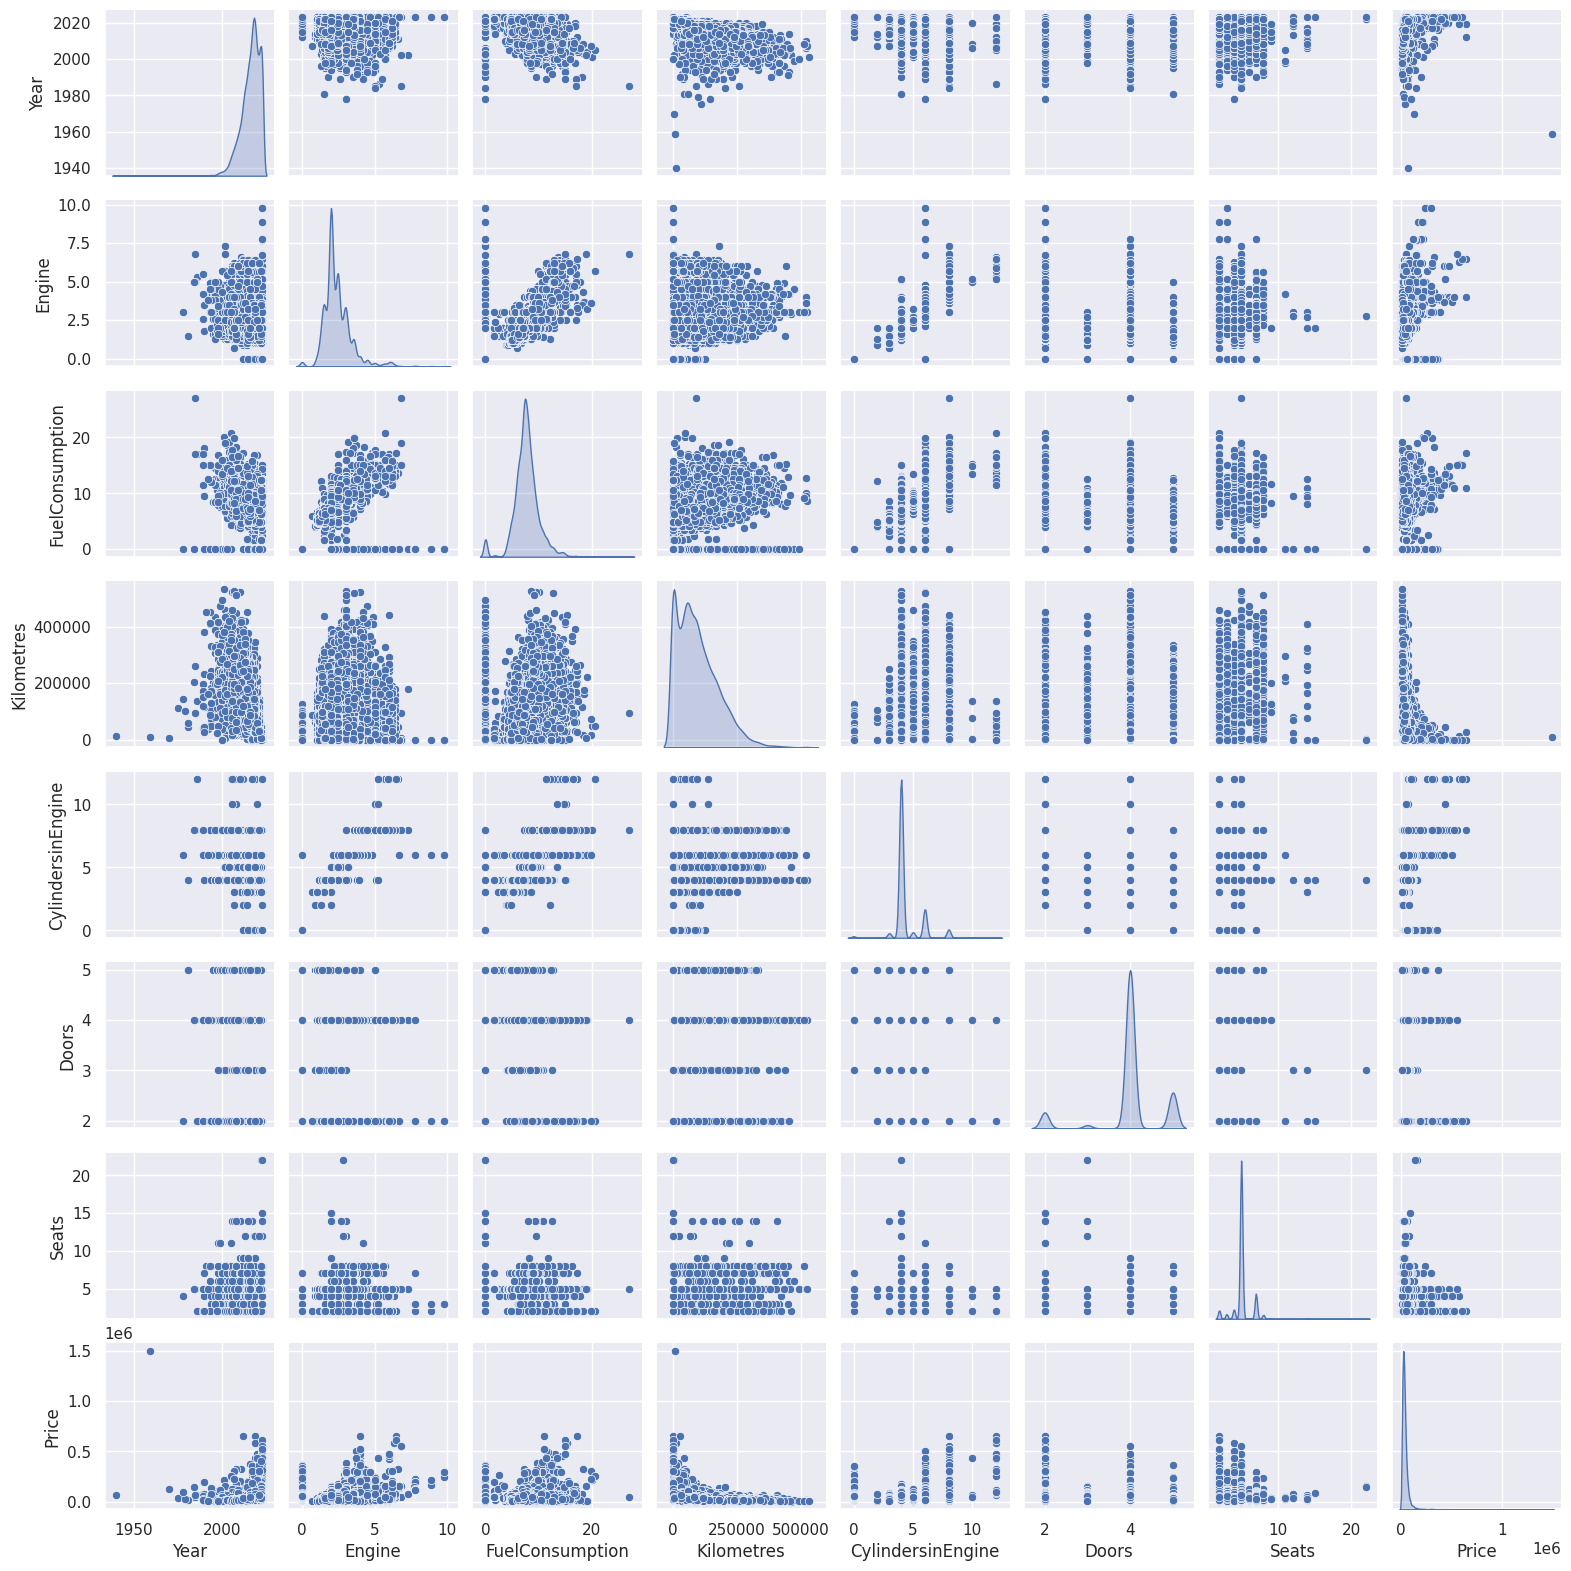

In [840]:
# 数字特征之间关系可视化
sns.set()
sns.pairplot(numeric_features, size=2, kind="scatter", diag_kind="kde")
plt.show()

In [841]:
# 类别特征分析
categorical_features.nunique()

Brand             76
Model            781
Car/Suv          613
Title           8781
UsedOrNew          3
Transmission       3
DriveType          5
FuelType           9
ColourExtInt     832
Location         619
BodyType          11
dtype: int64

In [842]:
# Title, Model, Car/Suv, ColourExtInt, Location 过于稀疏，抛弃
del categorical_features["Title"]
del categorical_features["Model"]
del categorical_features["Car/Suv"]
del categorical_features["ColourExtInt"]
del categorical_features["Location"]

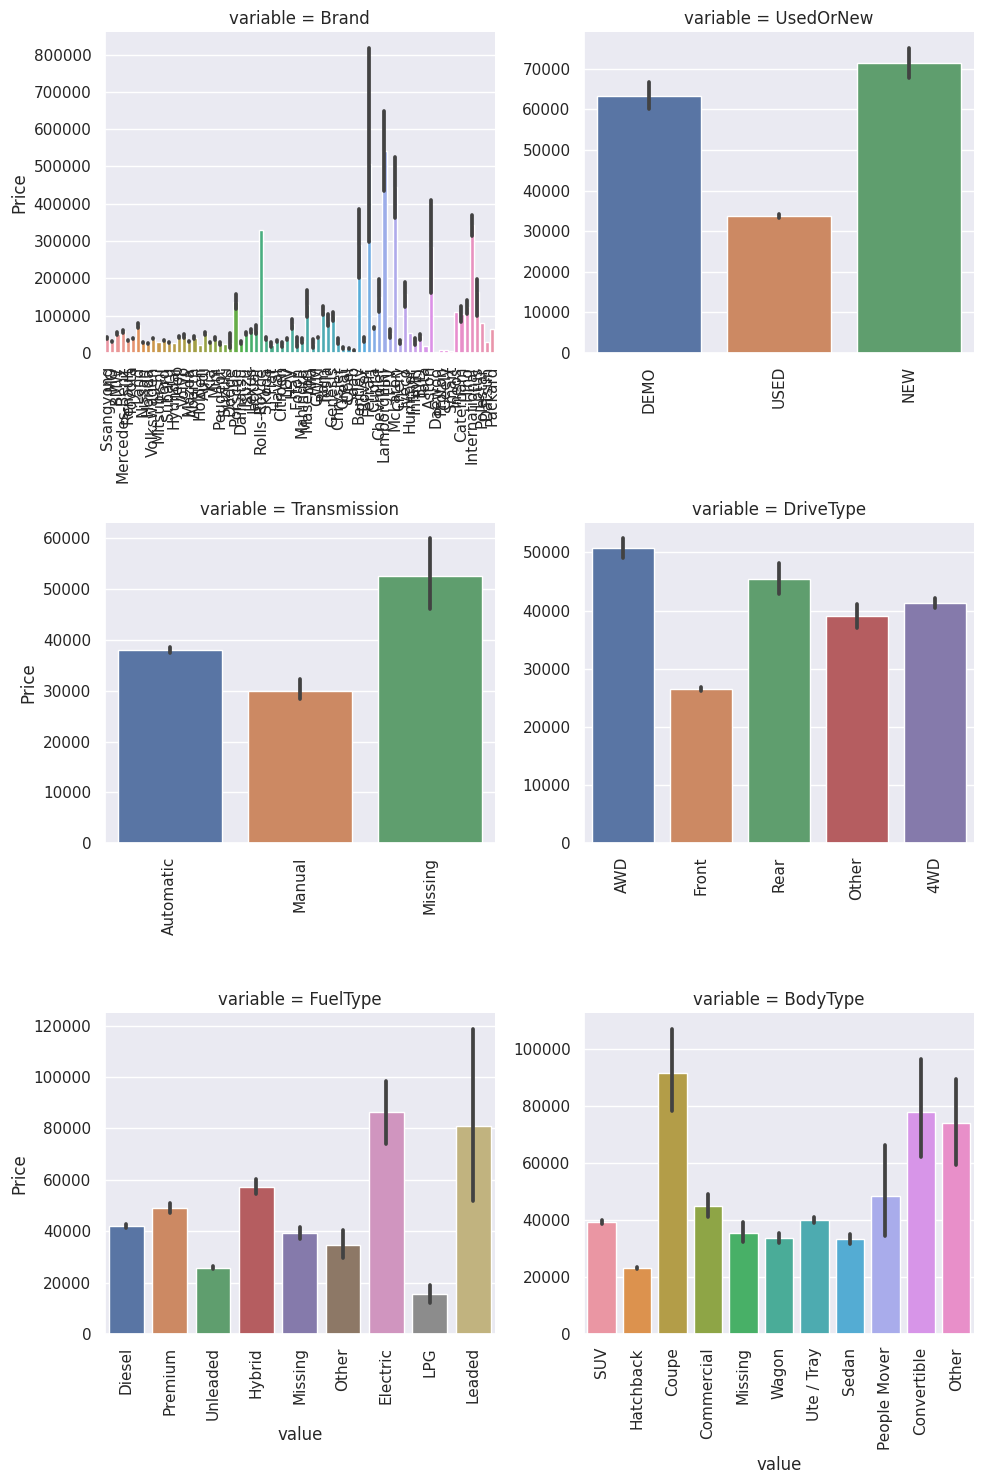

In [843]:
# 类别特征与价格关系可视化（柱形图）
def boxplot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x = plt.xticks(rotation=90)


f = pd.melt(df, id_vars=["Price"], value_vars=categorical_features.columns)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "Price")

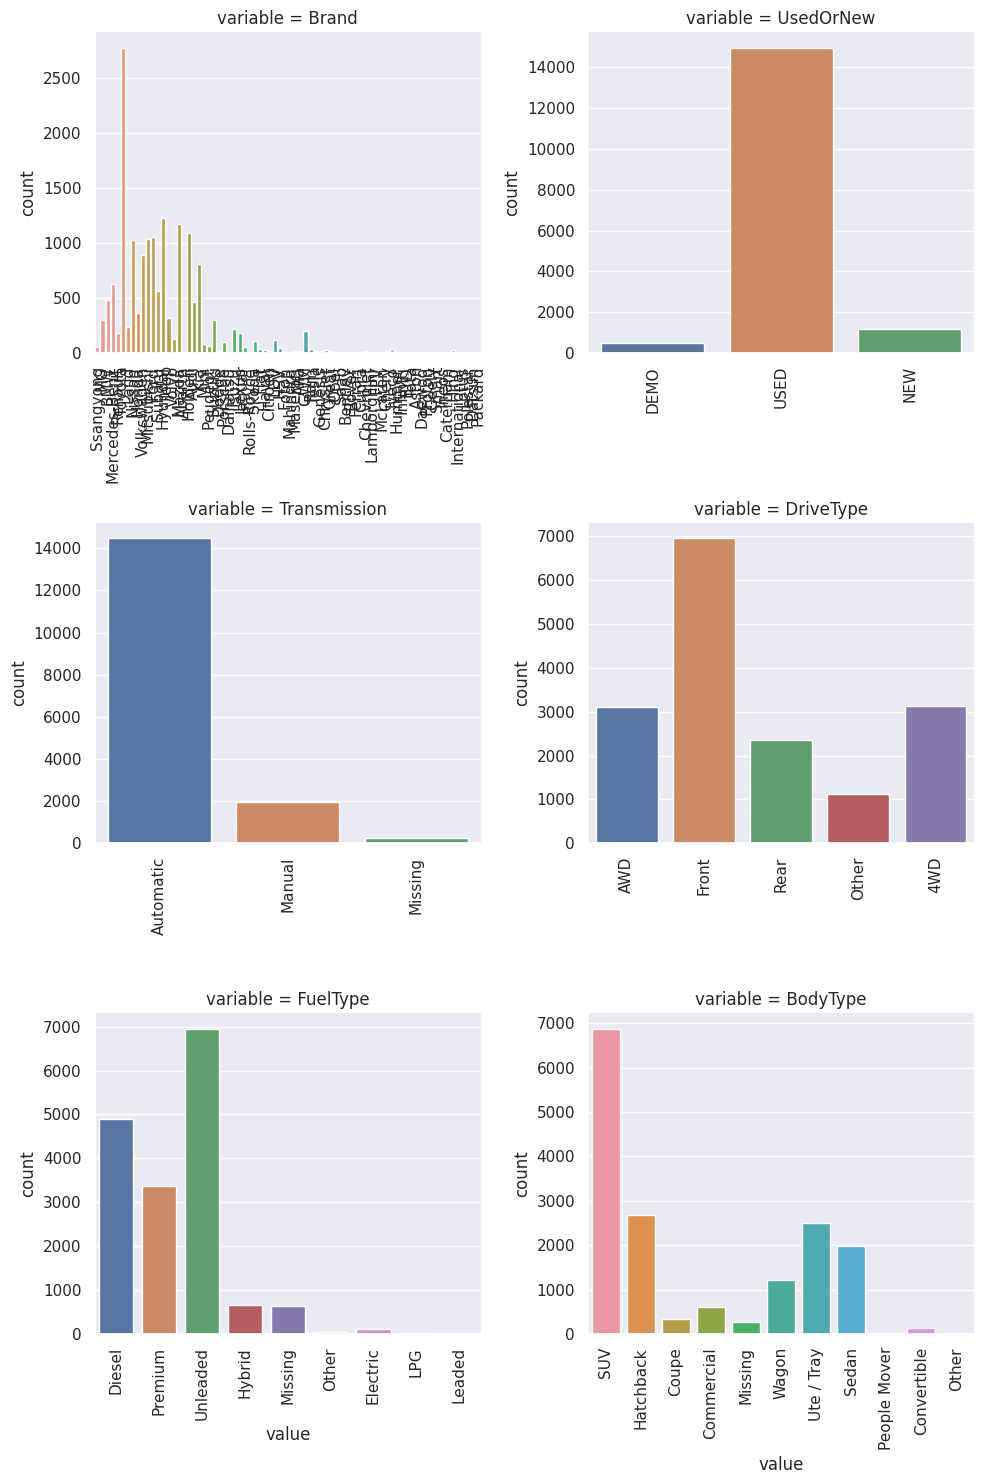

In [844]:
# 类别频数可视化（柱形图）
def count_plot(x, **kwargs):
    sns.countplot(x=x)
    x = plt.xticks(rotation=90)


f = pd.melt(df, value_vars=categorical_features.columns)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(count_plot, "value")

In [845]:
df.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                 0
Title                   0
UsedOrNew               0
Transmission            0
Engine               1656
DriveType               0
FuelType                0
FuelConsumption      1678
Kilometres              0
ColourExtInt            0
Location                0
CylindersinEngine    1655
BodyType                0
Doors                1655
Seats                1615
Price                   0
dtype: int64

In [846]:
df[df.Engine.isnull()].head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
5,Toyota,2004,Estima,ON FOUR WHEELS,2004 Toyota Estima T EDITION,USED,Automatic,NaN,Other,Unleaded,NaN,160230,Grey / -,"Saint Marys, NSW",NaN,Commercial,NaN,NaN,9990.0
10,Toyota,2009,HiAce,Carbarn,2009 Toyota HiAce (No Badge),USED,Automatic,NaN,Other,Unleaded,NaN,148190,White / -,"Lidcombe, NSW",NaN,Commercial,NaN,NaN,42500.0
12,Honda,2015,City,USED Dealer ad,2015 Honda City GM VTi-L Sedan 4dr CVT 7sp 1.5...,USED,Automatic,NaN,Other,Unleaded,NaN,181745,Black / -,"Rouse Hill, NSW",NaN,Missing,NaN,NaN,11999.0
13,Toyota,2017,HiAce,USED Dealer ad,2017 Toyota HiAce,USED,Automatic,NaN,Other,Missing,NaN,136296,Silver / Grey,"Lidcombe, NSW",NaN,Missing,NaN,NaN,38999.0
17,Mitsubishi,2013,Outlander,Exclusive Autohaus,2013 Mitsubishi Outlander ES,USED,Manual,NaN,Other,Missing,NaN,120020,Blue / Grey,"Blacktown, NSW",NaN,Wagon,NaN,NaN,13999.0


In [847]:
df[df.Engine.isnull()].Title

5                             2004 Toyota Estima T EDITION
10                            2009 Toyota HiAce (No Badge)
12       2015 Honda City GM VTi-L Sedan 4dr CVT 7sp 1.5...
13                                       2017 Toyota HiAce
17                            2013 Mitsubishi Outlander ES
                               ...                        
16711                                  2010 Nissan Elgrand
16722                            2022 Suzuki Swift GL Plus
16725                                   2011 Toyota Estima
16728                                  2014 Toyota Alphard
16729               2012 Mercedes-Benz S-Class CDI BlueTEC
Name: Title, Length: 1656, dtype: category
Categories (8781, object): ['1940 Packard 120', '1959 Ferrari 250 Pininfarina', '1970 Ford Falcon GT', '1975 BMW 2002', ..., '2023 Volvo Xc 60 Plus B5 AWD', '2023 Volvo Xc 60 Recharge Ultimate T8 AWD Plu..., '2023 Volvo Xc 60 Ultimate B5 AWD Bright', '2023 Volvo Xc 90 Recharge Ultimate T8 Geartro...]

In [848]:
from openai import OpenAI


def complete_by_gpt(df, index):
    fmt = """=== input ===
    输出 {Title} 的 “发动机容量”，“油耗（每百公里升数）”， “发动机中气缸数量”， “汽车的门数”， “汽车的座位数”
    === output ===
    输出类型为 float, 一共输出 5 个数字，用逗号分隔
    禁止输出数字以外的信息
    === example ===
    - 2.0，8.9，6.0，4.0，6.0
    - 3.0，9.9，6.0，5.0，8.0
    """

    OPENAI_API_KEY = ""

    client = OpenAI(
        api_key=OPENAI_API_KEY,  # this is also the default, it can be omitted
    )
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "user", "content": fmt.format(Title=df.at[index, "Title"])},
        ],
    )
    text = completion.choices[0].message.content
    print(text)
    text = text.split(",")
    try:
        if np.isnan(df.at[index, "Engine"]):
            df.at[index, "Engine"] = float(text[0])
        if np.isnan(df.at[index, "FuelConsumption"]):
            df.at[index, "FuelConsumption"] = float(text[1])
        if np.isnan(df.at[index, "CylindersinEngine"]):
            df.at[index, "CylindersinEngine"] = float(text[2])
        if np.isnan(df.at[index, "Doors"]):
            df.at[index, "Doors"] = float(text[3])
        if np.isnan(df.at[index, "Seats"]):
            df.at[index, "Seats"] = float(text[4])
    except Exception as e:
        print(e)
        print(text)

for index in df[df.Engine.isnull()].index:
    complete_by_gpt(df, index)

df.isnull().sum()

2.4, 9.5, 6, 4, 7
2.0,8.9,6.0,4.0,6.0
1.5, 7, 4, 4, 5
2.7, 7.8, 4.0, 4.0, 3.0
2.4, 8.7, 4, 4, 7
2.0,8.9,6.0,5.0,5.0
2.0, 8.9, 4.0, 4.0, 6.0
3.6, , 6, 4, 5
could not convert string to float: ' '
['3.6', ' ', ' 6', ' 4', ' 5']
2.0, 8.9, 4.0, 6.0
list index out of range
['2.0', ' 8.9', ' 4.0', ' 6.0']
2.0, 8.9, 4.0, 5.0, 5.0
2.0, 8.9, 4, 5, 8
3.5, 11.1, 6.0, 5.0, 8.0
1.8T, 0.0, 4.0, 4.0, 5.0
could not convert string to float: '1.8T'
['1.8T', ' 0.0', ' 4.0', ' 4.0', ' 5.0']
2.5, 7.0, 4, 3, 12
2.5,10.4,4.0,4.0,5.0
3.6, 7, 6, 4, 7
2.5，9.6，4.0，4.0，12.0
could not convert string to float: '2.5，9.6，4.0，4.0，12.0'
['2.5，9.6，4.0，4.0，12.0']
2.5, 10.2, 6, 4, 7
2.2, 0.3, 4.0, 5.0, 7.0
3.5, 11.2, 6.0, 4.0, 7.0
2.4, 8.9, 4, 5, 7
2.0,8.9,4.0,5.0,6.0
2.0, 8.9, 6.0, 4.0, 6.0
2.4, 5.7, 4.0, 4.0, 7.0
2.0, 8.9, 6.0, 4.0, 6.0
2.4, 5.3, 4.0, 4.0, 7.0
2.5, 9.8, 4.0, 4.0, 10.0
2.0, 8.9, 6.0, 3.0, 4.0
3.5, 0.0, 6.0, 2.0, 4.0
1.8T
could not convert string to float: '1.8T'
['1.8T']
2.7, 8.9, 4.0, 3.0, 11.0
1.6T，N/A，

Brand                  0
Year                   0
Model                  0
Car/Suv                0
Title                  0
UsedOrNew              0
Transmission           0
Engine               270
DriveType              0
FuelType               0
FuelConsumption      346
Kilometres             0
ColourExtInt           0
Location               0
CylindersinEngine    326
BodyType               0
Doors                334
Seats                344
Price                  0
dtype: int64

In [851]:
df.to_csv("car_clean.csv", index=False)

In [860]:
# 用平均数填充缺失值
df.Engine.fillna(df.Engine.mean(), inplace=True)
df.FuelConsumption.fillna(df.FuelConsumption.mean(), inplace=True)
df.CylindersinEngine.fillna(df.CylindersinEngine.mean(), inplace=True)
df.Doors.fillna(df.Doors.mean(), inplace=True)
df.Seats.fillna(df.Seats.mean(), inplace=True)

In [861]:
df.isnull().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

In [862]:
df.to_csv("car_clean_mean.csv", index=False)

In [865]:
# 用众数填充缺失值
df = pd.read_csv("car_clean.csv")
df.Engine.fillna(df.Engine.mode()[0], inplace=True)
df.FuelConsumption.fillna(df.FuelConsumption.mode()[0], inplace=True)
df.CylindersinEngine.fillna(df.CylindersinEngine.mode()[0], inplace=True)
df.Doors.fillna(df.Doors.mode()[0], inplace=True)
df.Seats.fillna(df.Seats.mode()[0], inplace=True)
df.to_csv("car_clean_mode.csv", index=False)

## 特征工程

In [371]:
df = pd.read_csv("car_clean.csv")

### 删除异常值

In [372]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = data_ser < val_low
        rule_up = data_ser > val_up
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())

    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

In [373]:
df.shape

(16672, 19)

Delete number is: 322
Now column number is: 16350
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Engine, dtype: float64
Description of data larger than the upper bound is:
count    322.000000
mean       6.128261
std        0.972412
min        5.200000
25%        5.700000
50%        6.000000
75%        6.200000
max       19.000000
Name: Engine, dtype: float64


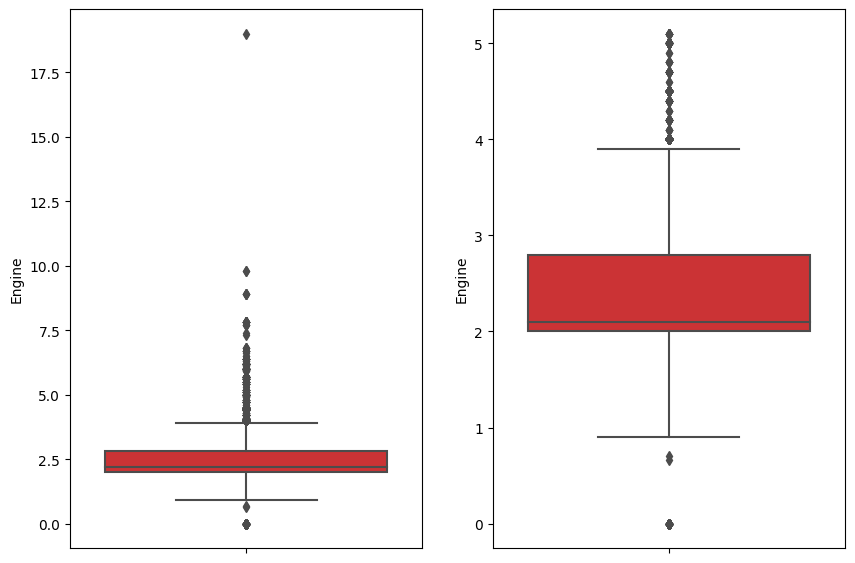

In [374]:
df = outliers_proc(df, "Engine", scale=3)

Delete number is: 31
Now column number is: 16319
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: FuelConsumption, dtype: float64
Description of data larger than the upper bound is:
count    31.000000
mean     17.303226
std       1.195125
min      16.000000
25%      16.400000
50%      17.100000
75%      17.950000
max      20.000000
Name: FuelConsumption, dtype: float64


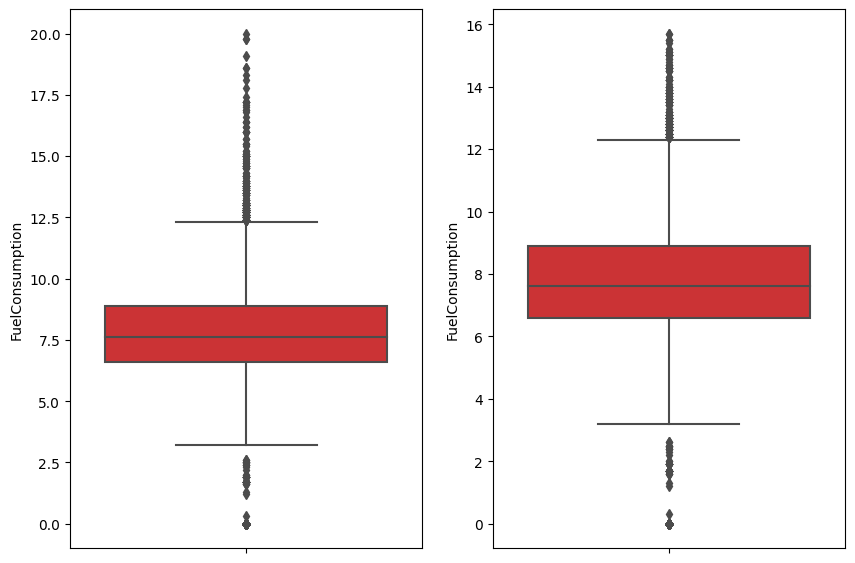

In [375]:
df = outliers_proc(df, "FuelConsumption", scale=3)

Delete number is: 8
Now column number is: 16311
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Kilometres, dtype: float64
Description of data larger than the upper bound is:
count         8.000000
mean     512742.750000
std       19857.200664
min      473640.000000
25%      507817.250000
50%      520495.500000
75%      522868.750000
max      533849.000000
Name: Kilometres, dtype: float64


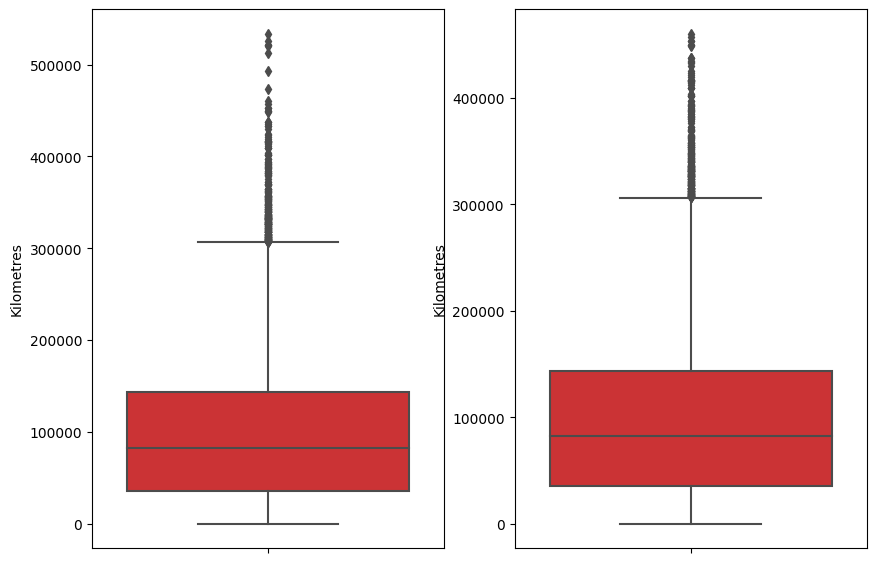

In [376]:
df = outliers_proc(df, "Kilometres", scale=3)

In [377]:
df.isna().sum()

Brand                  0
Year                   0
Model                  0
Car/Suv                0
Title                  0
UsedOrNew              0
Transmission           0
Engine               270
DriveType              0
FuelType               0
FuelConsumption      346
Kilometres             0
ColourExtInt           0
Location               0
CylindersinEngine    326
BodyType               0
Doors                334
Seats                339
Price                  0
dtype: int64

### 构造特征值

In [378]:
# 汽车年龄
df["Age"] = 2023 - df["Year"]
df.drop(["Year"], axis=1, inplace=True)

In [379]:
df.Location.value_counts()

Location
Minchinbury, NSW         532
Missing                  409
Blacktown, NSW           290
Liverpool, NSW           247
Hoppers Crossing, VIC    217
                        ... 
West Lakes, SA             1
Hyde Park, SA              1
Goodwood, SA               1
Morwell, VIC               1
East Toowoomba, QLD        1
Name: count, Length: 618, dtype: int64

In [380]:
# 提取洲名 (State) 剔除过于离散的城市名 (City)
df[["City", "State"]] = df["Location"].str.split(",", expand=True)
df = df.drop(["Location", "City"], axis=1)

In [381]:
df.head()

,Brand,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats,Price,Age,State
0,Ssangyong,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,2.2,AWD,Diesel,8.7,5595,White / Black,4.0,SUV,4.0,7.0,51990.0,1,NSW
1,MG,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,1.5,Front,Premium,6.7,16,Black / Black,4.0,Hatchback,5.0,5.0,19990.0,1,NSW
2,BMW,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,2.0,Rear,Premium,6.6,8472,Grey / White,4.0,Coupe,2.0,4.0,108988.0,1,NSW
3,Renault,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,1.3,Front,Unleaded,6.0,1035,Grey / Black,4.0,SUV,4.0,5.0,34990.0,1,NSW
4,Toyota,Estima,ON FOUR WHEELS,2004 Toyota Estima T EDITION,USED,Automatic,2.4,Other,Unleaded,9.5,160230,Grey / -,6.0,Commercial,4.0,7.0,9990.0,19,NSW


In [382]:
# 分离训练集和测试集
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [383]:
df.Brand.value_counts()

Brand
Toyota         2769
Hyundai        1230
Mazda          1169
Ford           1041
Mitsubishi     1034
               ... 
Geely             1
Smart             1
Lamborghini       1
Polestar          1
Packard           1
Name: count, Length: 73, dtype: int64

> 根据训练集构建品牌(Brand)的销售统计量

In [384]:
train_gb = train_data.groupby("Brand")
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data["Price"] > 0]
    info["brand_amount"] = len(kind_data)
    info["brand_price_max"] = kind_data.Price.max()
    info["brand_price_median"] = kind_data.Price.median()
    info["brand_price_min"] = kind_data.Price.min()
    info["brand_price_sum"] = kind_data.Price.sum()
    info["brand_price_std"] = kind_data.Price.std()
    info["brand_price_average"] = round(kind_data.Price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "Brand"})
df = df.merge(brand_fe, how="left", on="Brand")

In [385]:
df.head()

,Brand,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,...,Price,Age,State,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,Ssangyong,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,2.2,AWD,Diesel,8.7,...,51990.0,1,NSW,43.0,58585.0,43660.0,8999.0,1713345.0,13822.300006,38939.66
1,MG,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,1.5,Front,Premium,6.7,...,19990.0,1,NSW,252.0,57709.0,27990.0,12990.0,7506942.0,9586.797314,29671.71
2,BMW,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,2.0,Rear,Premium,6.6,...,108988.0,1,NSW,381.0,299990.0,39441.0,3999.0,19945597.0,46450.746597,52213.60
3,Renault,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,1.3,Front,Unleaded,6.0,...,34990.0,1,NSW,138.0,78309.0,31950.0,6990.0,4767103.0,15057.851639,34295.71
4,Toyota,Estima,ON FOUR WHEELS,2004 Toyota Estima T EDITION,USED,Automatic,2.4,Other,Unleaded,9.5,...,9990.0,19,NSW,2203.0,174880.0,33968.0,2995.0,85720656.0,24445.396902,38893.22


In [386]:
df.columns 

Index(['Brand', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission',
       'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres',
       'ColourExtInt', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats',
       'Price', 'Age', 'State', 'brand_amount', 'brand_price_max',
       'brand_price_median', 'brand_price_min', 'brand_price_sum',
       'brand_price_std', 'brand_price_average'],
      dtype='object')

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16311 entries, 0 to 16310
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                16311 non-null  object 
 1   Model                16311 non-null  object 
 2   Car/Suv              16311 non-null  object 
 3   Title                16311 non-null  object 
 4   UsedOrNew            16311 non-null  object 
 5   Transmission         16311 non-null  object 
 6   Engine               16041 non-null  float64
 7   DriveType            16311 non-null  object 
 8   FuelType             16311 non-null  object 
 9   FuelConsumption      15965 non-null  float64
 10  Kilometres           16311 non-null  int64  
 11  ColourExtInt         16311 non-null  object 
 12  CylindersinEngine    15985 non-null  float64
 13  BodyType             16311 non-null  object 
 14  Doors                15977 non-null  float64
 15  Seats                15972 non-null 

In [388]:
df.to_csv("data_for_tree.csv", index=False)

In [464]:
df = pd.read_csv("data_for_tree.csv")

In [465]:
numeric_features = df.select_dtypes(include=[np.int64, np.float64])
numeric_features.columns

Index(['Engine', 'FuelConsumption', 'Kilometres', 'CylindersinEngine', 'Doors',
       'Seats', 'Price', 'Age', 'brand_amount', 'brand_price_max',
       'brand_price_median', 'brand_price_min', 'brand_price_sum',
       'brand_price_std', 'brand_price_average'],
      dtype='object')

In [466]:
# 归一化
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

<Axes: ylabel='Frequency'>

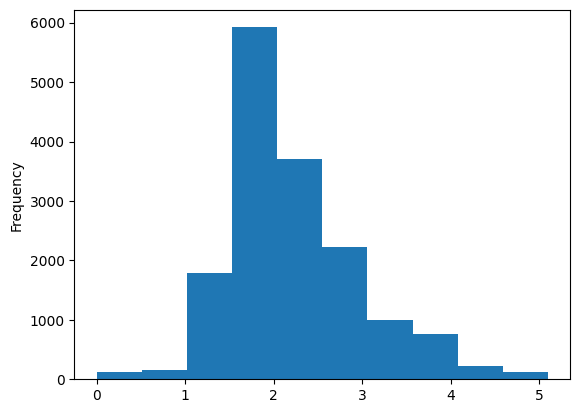

In [467]:
df["Engine"].plot.hist()

<Axes: ylabel='Frequency'>

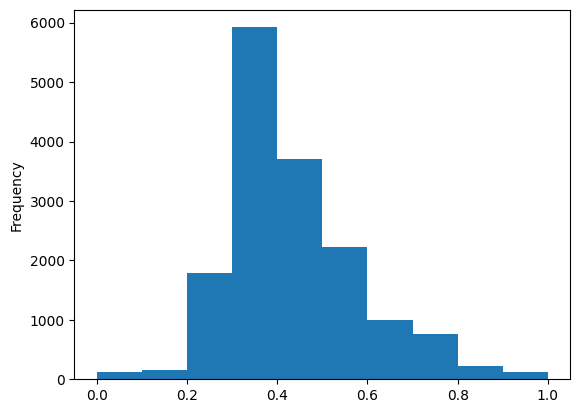

In [468]:
# 归一化
df["Engine"] = max_min(df["Engine"])
df["Engine"].plot.hist()

<Axes: ylabel='Frequency'>

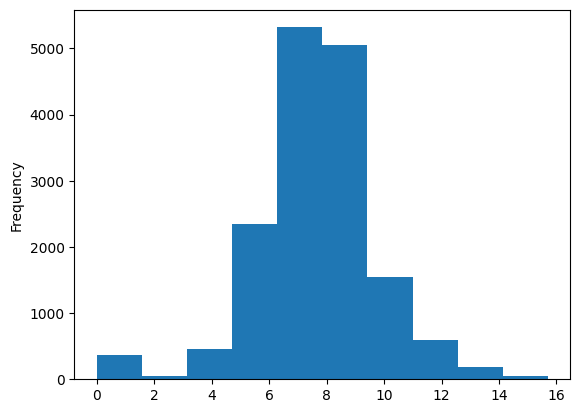

In [469]:
df["FuelConsumption"].plot.hist()

<Axes: ylabel='Frequency'>

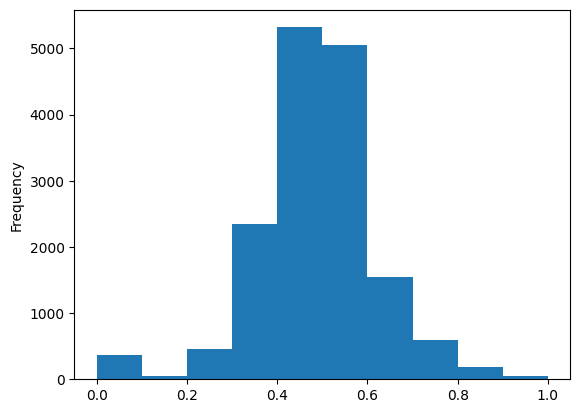

In [470]:
# 归一化
df["FuelConsumption"] = max_min(df["FuelConsumption"])
df["FuelConsumption"].plot.hist()

<Axes: ylabel='Frequency'>

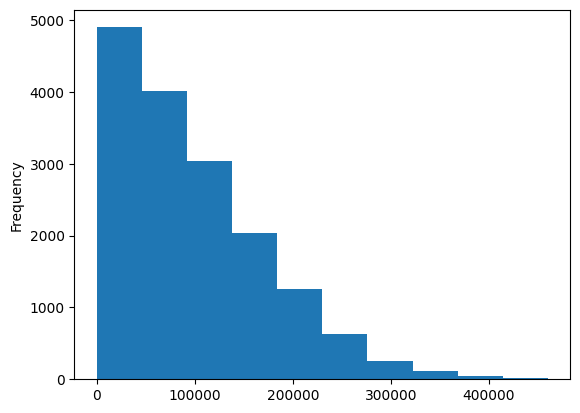

In [471]:
df["Kilometres"].plot.hist()

<Axes: ylabel='Frequency'>

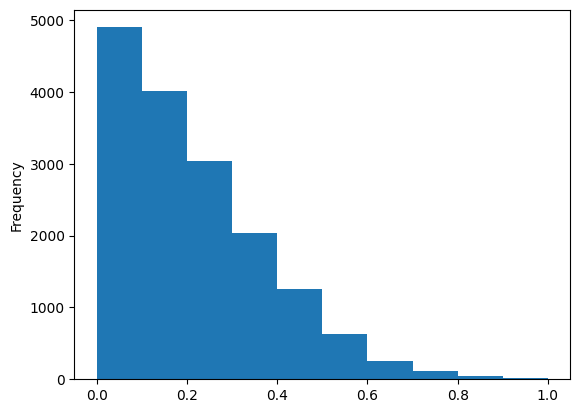

In [472]:
# 归一化
df["Kilometres"] = max_min(df["Kilometres"])
df["Kilometres"].plot.hist()

<Axes: ylabel='Frequency'>

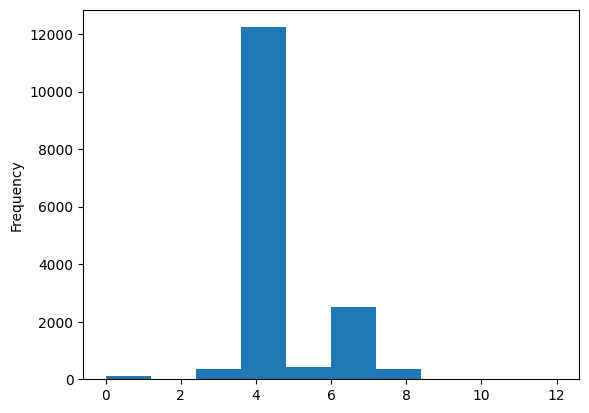

In [473]:
df["CylindersinEngine"].plot.hist()

<Axes: ylabel='Frequency'>

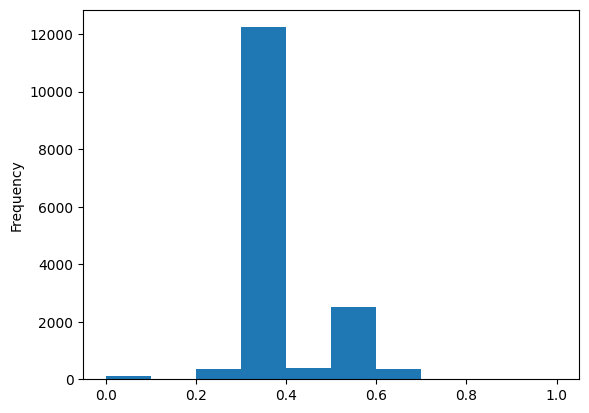

In [474]:
# 归一化
df["CylindersinEngine"] = max_min(df["CylindersinEngine"])
df["CylindersinEngine"].plot.hist()

In [475]:
df["brand_amount"] = max_min(df["brand_amount"])
df["brand_price_average"] = max_min(df["brand_price_average"])
df["brand_price_max"] = max_min(df["brand_price_max"])
df["brand_price_median"] = max_min(df["brand_price_median"])
df["brand_price_min"] = max_min(df["brand_price_min"])
df["brand_price_std"] = max_min(df["brand_price_std"])
df["brand_price_sum"] = max_min(df["brand_price_sum"])

In [476]:
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['Brand', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission',
       'DriveType', 'FuelType', 'ColourExtInt', 'BodyType', 'State'],
      dtype='object')

In [477]:
categorical_features.nunique()

Brand             73
Model            737
Car/Suv          606
Title           8525
UsedOrNew          3
Transmission       3
DriveType          5
FuelType           9
ColourExtInt     817
BodyType          11
State              9
dtype: int64

In [478]:
df = df.dropna()
df = df.drop(["Title", "Car/Suv", "ColourExtInt", "Model", "Brand"], axis=1)
categorical_features = df.select_dtypes(include=[object])
categorical_features.nunique()

UsedOrNew        3
Transmission     3
DriveType        5
FuelType         9
BodyType        11
State            9
dtype: int64

In [479]:
df.isna().sum()

UsedOrNew              0
Transmission           0
Engine                 0
DriveType              0
FuelType               0
FuelConsumption        0
Kilometres             0
CylindersinEngine      0
BodyType               0
Doors                  0
Seats                  0
Price                  0
Age                    0
State                  0
brand_amount           0
brand_price_max        0
brand_price_median     0
brand_price_min        0
brand_price_sum        0
brand_price_std        0
brand_price_average    0
dtype: int64

In [480]:
df = pd.get_dummies(df, columns=categorical_features.columns)
df.columns

Index(['Engine', 'FuelConsumption', 'Kilometres', 'CylindersinEngine', 'Doors',
       'Seats', 'Price', 'Age', 'brand_amount', 'brand_price_max',
       'brand_price_median', 'brand_price_min', 'brand_price_sum',
       'brand_price_std', 'brand_price_average', 'UsedOrNew_DEMO',
       'UsedOrNew_NEW', 'UsedOrNew_USED', 'Transmission_Automatic',
       'Transmission_Manual', 'Transmission_Missing', 'DriveType_4WD',
       'DriveType_AWD', 'DriveType_Front', 'DriveType_Other', 'DriveType_Rear',
       'FuelType_Diesel', 'FuelType_Electric', 'FuelType_Hybrid',
       'FuelType_LPG', 'FuelType_Leaded', 'FuelType_Missing', 'FuelType_Other',
       'FuelType_Premium', 'FuelType_Unleaded', 'BodyType_Commercial',
       'BodyType_Convertible', 'BodyType_Coupe', 'BodyType_Hatchback',
       'BodyType_Missing', 'BodyType_Other', 'BodyType_People Mover',
       'BodyType_SUV', 'BodyType_Sedan', 'BodyType_Ute / Tray',
       'BodyType_Wagon', 'State_ ACT', 'State_ AU-VIC', 'State_ NSW',
       '

### 模型调参

In [481]:
df.to_csv("data_for_lr.csv", index=0)

In [482]:
def reduce_mem_usage(df):
    """iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
    """
    start_mem = df.memory_usage().sum()
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum()
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))
    return df

In [483]:
df = reduce_mem_usage(pd.read_csv("data_for_lr.csv"))
# df = df.select_dtypes(include=[np.int64, np.float64])

Memory usage of dataframe is 2485088.00 MB
Memory usage after optimization is: 1724069.00 MB
Decreased by 30.6%


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15531 entries, 0 to 15530
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Engine                  15531 non-null  float16
 1   FuelConsumption         15531 non-null  float16
 2   Kilometres              15531 non-null  float16
 3   CylindersinEngine       15531 non-null  float16
 4   Doors                   15531 non-null  float16
 5   Seats                   15531 non-null  float16
 6   Price                   15531 non-null  float32
 7   Age                     15531 non-null  int8   
 8   brand_amount            15531 non-null  float16
 9   brand_price_max         15531 non-null  float16
 10  brand_price_median      15531 non-null  float16
 11  brand_price_min         15531 non-null  float16
 12  brand_price_sum         15531 non-null  float16
 13  brand_price_std         15531 non-null  float16
 14  brand_price_average     15531 non-null

In [485]:
df.dropna(inplace=True)

In [486]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Price", axis=1), df.Price, test_size=0.3, random_state=42
)

It is clear to see the price shows a typical exponential distribution


<Axes: xlabel='Price', ylabel='Density'>

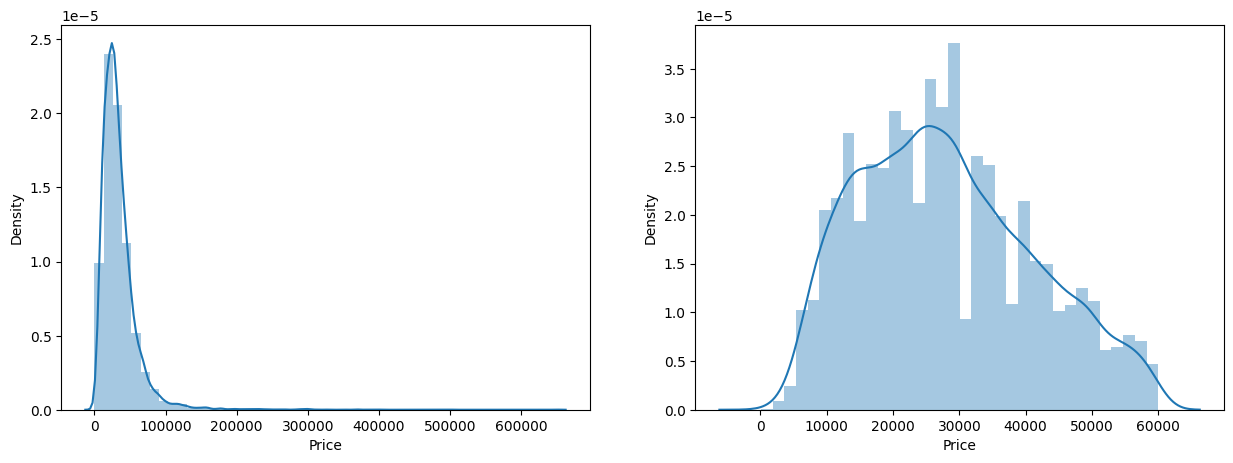

In [487]:
import seaborn as sns

print("It is clear to see the price shows a typical exponential distribution")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(y_train)
plt.subplot(1, 2, 2)
sns.distplot(y_train[y_train < np.quantile(y_train, 0.9)])

The transformed price seems like normal distribution


<Axes: xlabel='Price', ylabel='Density'>

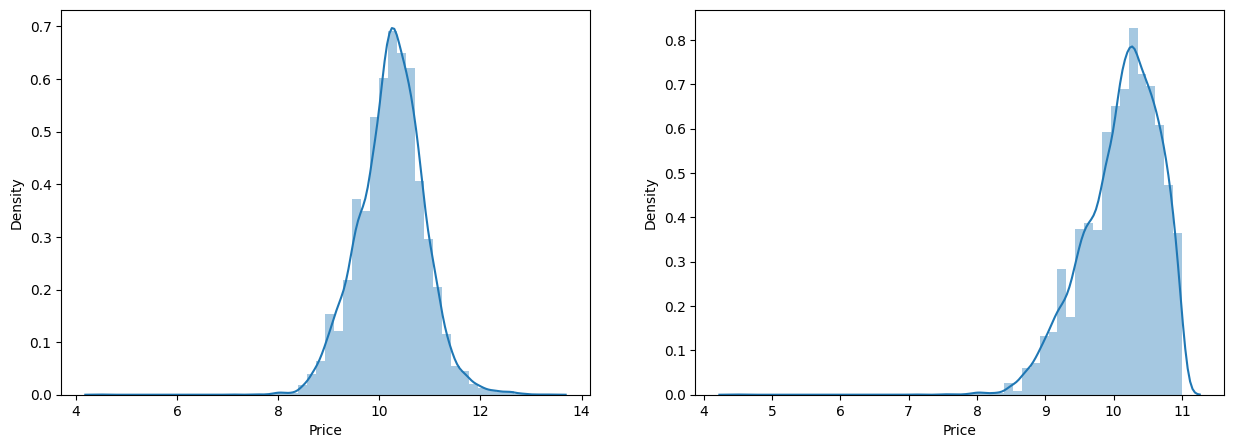

In [488]:
ln_y_train = np.log(y_train + 1)
print("The transformed price seems like normal distribution")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(ln_y_train)
plt.subplot(1, 2, 2)
sns.distplot(ln_y_train[ln_y_train < np.quantile(ln_y_train, 0.9)])

In [489]:
# 非线性模型
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_absolute_error, make_scorer, r2_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score, KFold

In [490]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(solver="lbfgs", max_iter=100),
    XGBRegressor(
        n_estimators=100,
        objective="reg:squarederror",
        enable_categorical=True,
        force_col_wise=True,
    ),
    LGBMRegressor(n_estimators=100, force_col_wise=True),
]

In [492]:
result = dict()
result_reverse = dict()
for model in models:
    model_name = str(model).split("(")[0]
    max_allowed_value = 1e2  # Adjust this value based on your data
    y_pred = model.fit(x_train, ln_y_train).predict(x_test)
    y_pred = np.clip(y_pred, -max_allowed_value, max_allowed_value)
    r2 = r2_score(np.log(y_test + 1), y_pred)
    r2_reverse = r2_score(y_test, np.exp(y_pred) - 1)
    result[model_name] = r2
    result_reverse[model_name] = r2_reverse
    print(model_name + " is finished")

LinearRegression is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
GradientBoostingRegressor is finished
MLPRegressor is finished
XGBRegressor is finished
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 10871, number of used features: 49
[LightGBM] [Info] Start training from score 10.239772
LGBMRegressor is finished


In [ ]:
result = pd.DataFrame(result, index=["r2_score"])
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,LGBMRegressor
r2_score,0.832538,0.808188,0.910121,0.884773,0.831159,0.915739,0.91548


In [ ]:
result = pd.DataFrame(result_reverse, index=["r2_score"])
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,LGBMRegressor
r2_score,-inf,0.729751,0.870615,0.833239,0.732147,0.903272,0.878963


In [ ]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    ax=None,  # 选择子图
    ylim=None,  # 设置纵坐标的取值范围
    cv=None,  # 交叉验证
    n_jobs=None,  # 设定索要使用的线程
):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, shuffle=True, cv=cv, random_state=42, n_jobs=n_jobs
    )
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()  # 绘制网格，不是必须
    ax.plot(
        train_sizes,
        np.mean(train_scores, axis=1),
        "o-",
        color="r",
        label="Training score",
    )
    ax.plot(
        train_sizes, np.mean(test_scores, axis=1), "o-", color="g", label="Test score"
    )
    ax.legend(loc="best")
    return ax

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 交叉验证模式

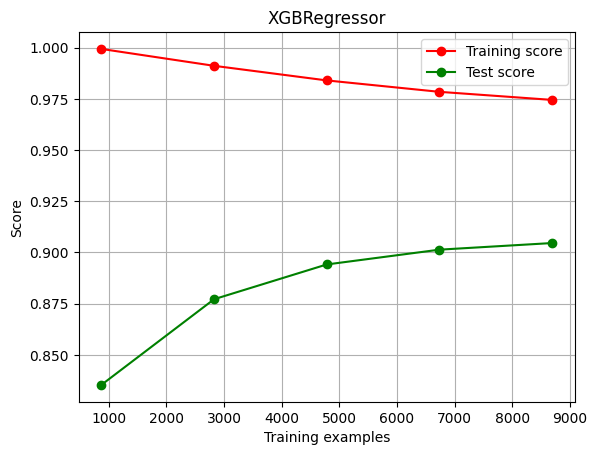

In [493]:
plot_learning_curve(
    estimator=XGBRegressor(), title="XGBRegressor", X=x_train, y=ln_y_train, cv=cv, n_jobs=-1
)
plt.show()

#### 树的数量

In [ ]:
from sklearn.metrics import make_scorer, roc_auc_score

In [ ]:
def r2_scoring(y_true, y_pred, **kwargs):
    max_allowed_value = 1e2  # Adjust this value based on your data
    y_pred = np.clip(y_pred, 0, max_allowed_value)
    return r2_score(np.exp(y_true) - 1, np.exp(y_pred) - 1)


r2_scorer = make_scorer(r2_scoring)

In [ ]:
reg = XGBRegressor()

cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean()

0.8323440029405965

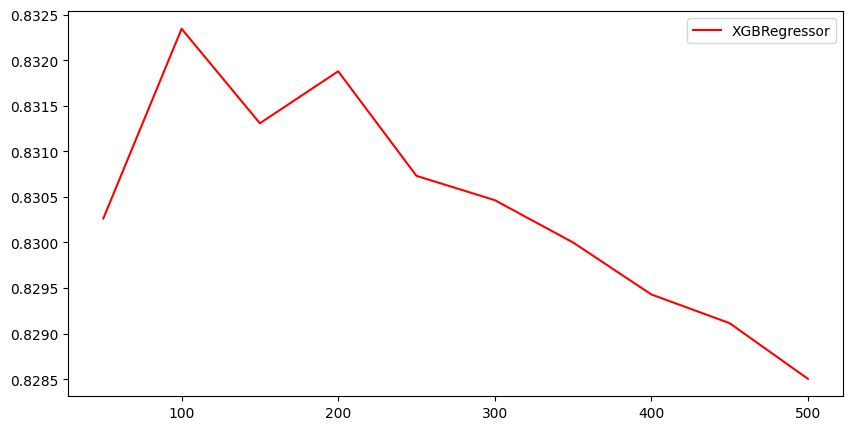

100 0.8323440029405965


In [ ]:
axisx = np.arange(50, 501, 50)
rs = []
for i in axisx:
    reg = XGBRegressor(n_estimators=i, random_state=42)
    rs.append(
        cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean()
    )
plt.figure(figsize=(10, 5))
plt.plot(axisx, rs, c="red", label="XGBRegressor")
plt.legend()
plt.show()

print(axisx[rs.index(max(rs))], max(rs))
n_estimators = axisx[rs.index(max(rs))]

#### 抽样率

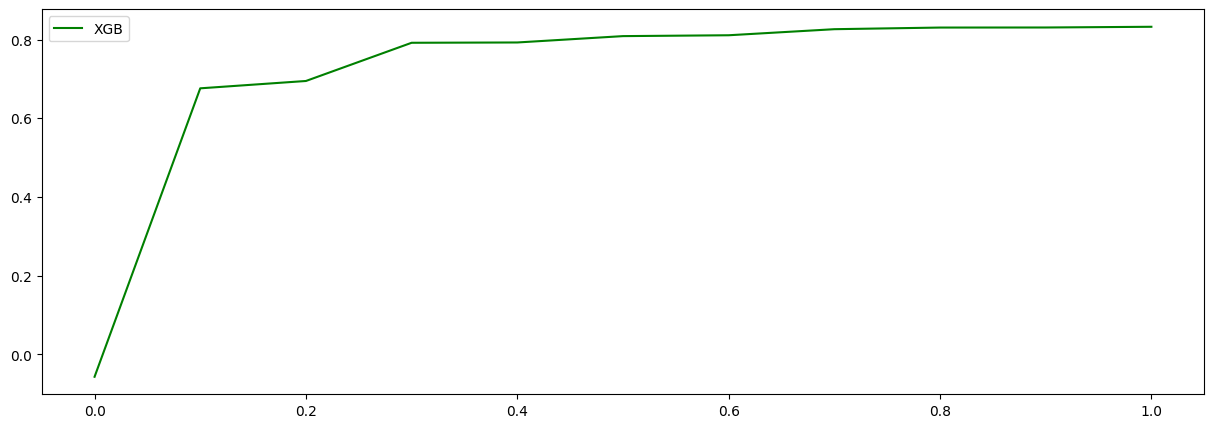

1.0 0.8323440029405965


In [ ]:
axisx = np.linspace(0, 1, 11)
rs = []
for i in axisx:
    reg = XGBRegressor(n_estimators=n_estimators, subsample=i, random_state=42)
    rs.append(cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean())
plt.figure(figsize=(15, 5))
plt.plot(axisx, rs, c="green", label="XGB")
plt.legend()
plt.show()

print(axisx[rs.index(max(rs))], max(rs))
subsample = axisx[rs.index(max(rs))]

In [ ]:
ln_y_test = np.log(y_test + 1)

> subsample 设置为 1.0 效果最好

- subsample 设置为 1.0，则每棵树都使用训练集中的全部样本进行训练
- 如果 subsample 小于 1.0，那么每棵树的训练样本就是通过对训练集进行随机抽样得到的，抽样的比例就是 subsample 的值
- 默认 1

#### 学习率

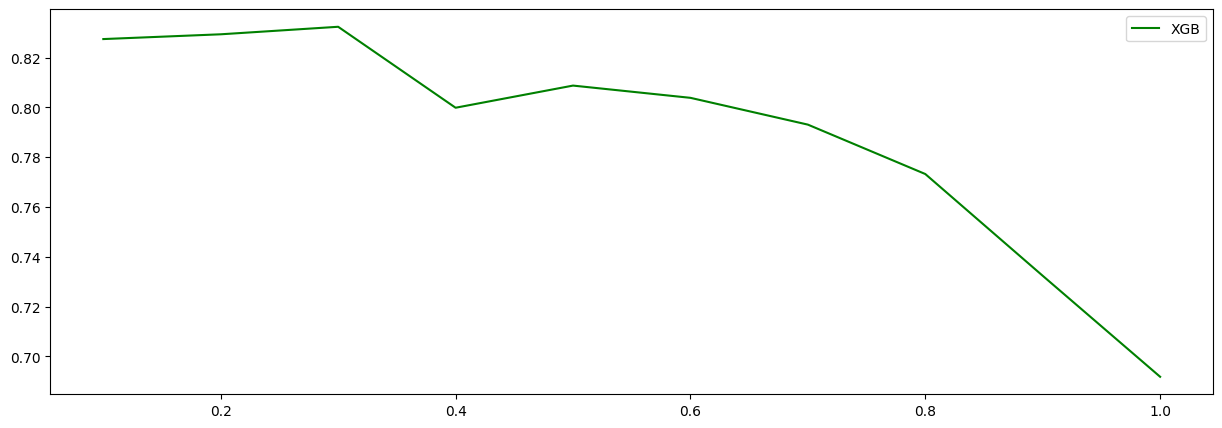

0.30000000000000004 0.8323440029405965


In [ ]:
num = []
rs = []
for i in np.linspace(0.1, 1, 10):
    reg = XGBRegressor(n_estimators=n_estimators, random_state=42, learning_rate=i).fit(
        x_train, ln_y_train
    )
    num.append(i)
    rs.append(cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean())
plt.figure(figsize=(15, 5))
plt.plot(num, rs, c="green", label="XGB")
plt.legend()
plt.show()
print(num[rs.index(max(rs))], max(rs))
learning_rate = num[rs.index(max(rs))]

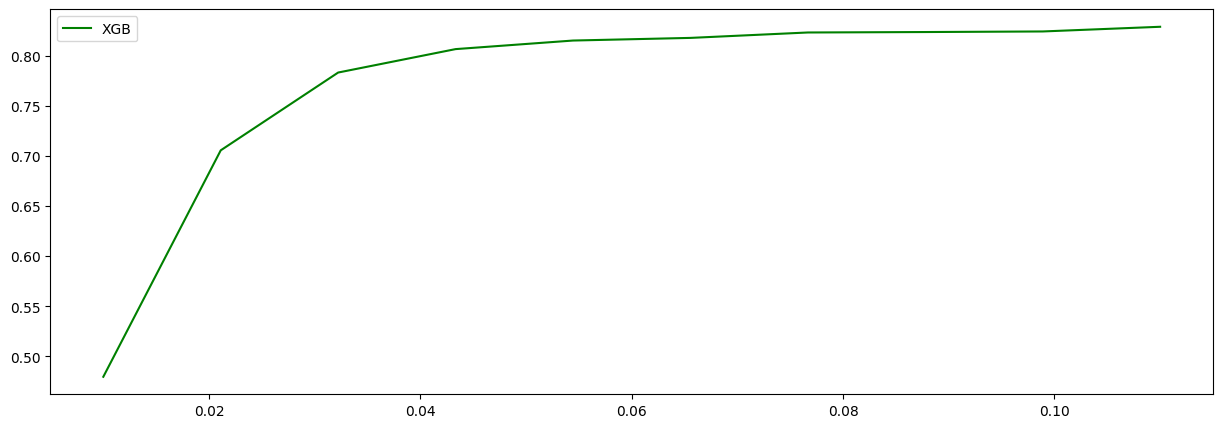

0.11 0.8289046505156232


In [ ]:
# 查看 0.01 - 0.11 之间的学习曲线
num = []
rs = []
for i in np.linspace(0.01, 0.11, 10):
    reg = XGBRegressor(n_estimators=n_estimators, random_state=42, learning_rate=i).fit(
        x_train, ln_y_train
    )
    num.append(i)
    rs.append(
        cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean()
    )
plt.figure(figsize=(15, 5))
plt.plot(num, rs, c="green", label="XGB")
plt.legend()
plt.show()
print(num[rs.index(max(rs))], max(rs))
learning_rate = num[rs.index(max(rs))]

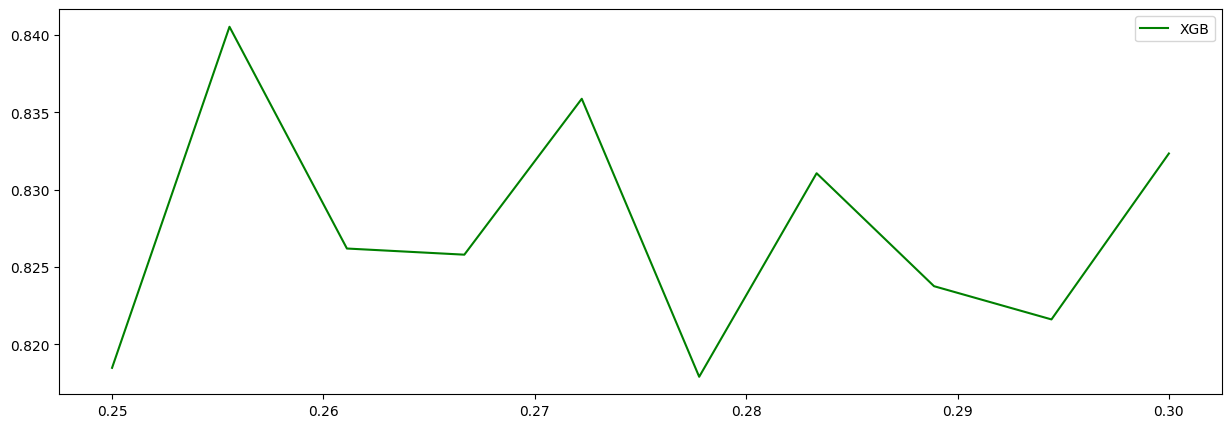

0.25555555555555554 0.8405388887279492


In [ ]:
# 增加 0.25 - 0.30 之间学习率的细粒度
num = []
rs = []
for i in np.linspace(0.25, 0.30, 10):
    reg = XGBRegressor(n_estimators=n_estimators, random_state=42, learning_rate=i).fit(
        x_train, ln_y_train
    )
    num.append(i)
    rs.append(
        cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean()
    )
plt.figure(figsize=(15, 5))
plt.plot(num, rs, c="green", label="XGB")
plt.legend()
plt.show()
print(num[rs.index(max(rs))], max(rs))
learning_rate = num[rs.index(max(rs))]

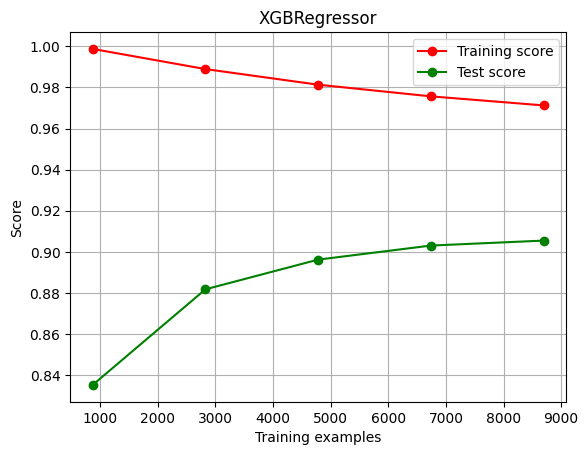

In [ ]:
# 再次查看学习曲线，看看过拟合现象有没有缓和
plot_learning_curve(
    estimator=XGBRegressor(n_estimators=n_estimators, random_state=42, learning_rate=learning_rate),
    title="XGBRegressor",
    X=x_train,
    y=ln_y_train,
    cv=cv,
    n_jobs=-1,
)
plt.show()

#### 弱评估器

gbtree
0.8405388887279492
gblinear


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.6246046447796595


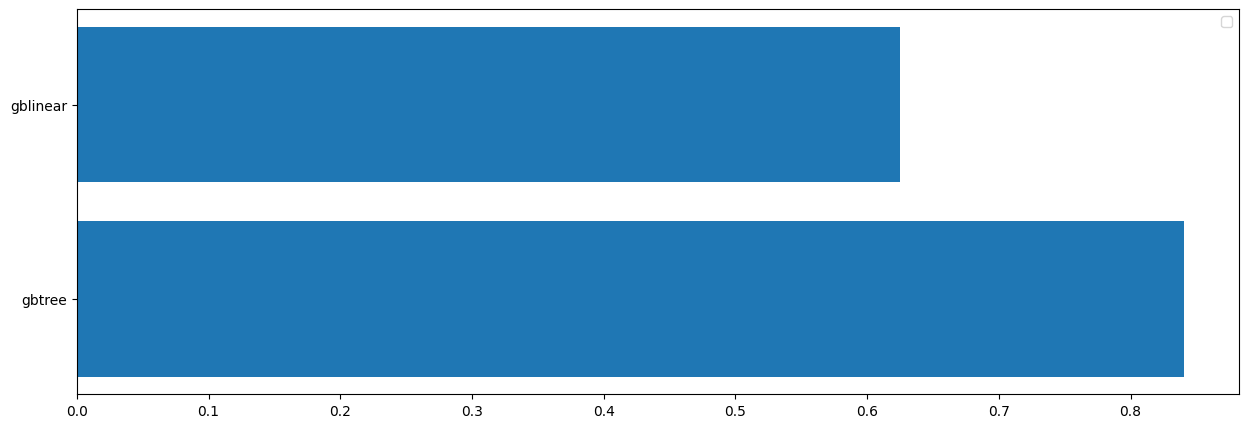

In [ ]:
# booster = ["gbtree", "gblinear", "dart"]
booster = ["gbtree", "gblinear"]
rs = []
for i in booster:
    reg = XGBRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42,
        booster=i,
    ).fit(x_train, ln_y_train)
    print(i)
    score = cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean()
    print(score)
    rs.append(score)
plt.figure(figsize=(15, 5))
plt.barh(booster, rs)
plt.legend()
plt.show()

> `gbtree` `dart` 效果接近，使用默认的 `gbtree` 即可，性能好 (`dart` 太慢了)

#### 正则参数

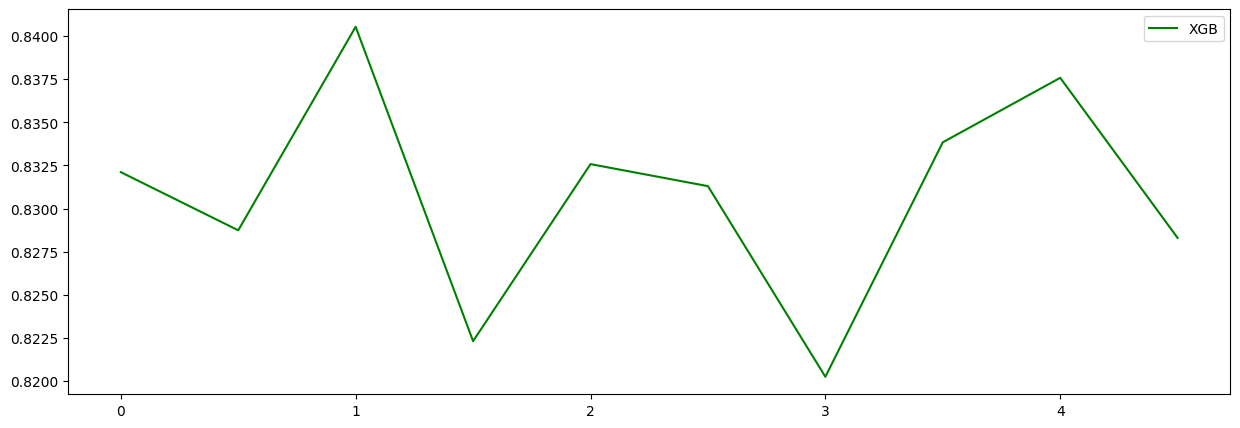

1.0 0.8405388887279492


In [ ]:
# L2正则项的参数:reg_lambda
num = []
rs = []
for i in np.arange(0, 5, 0.5):
    reg = XGBRegressor(
        n_estimators=n_estimators,
        random_state=42,
        learning_rate=learning_rate,
        reg_lambda=i,
    ).fit(x_train, ln_y_train)
    num.append(i)
    rs.append(cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean())
plt.figure(figsize=(15, 5))
plt.plot(num, rs, c="green", label="XGB")
plt.legend()
plt.show()
print(num[rs.index(max(rs))], max(rs))
reg_lambda = num[rs.index(max(rs))]

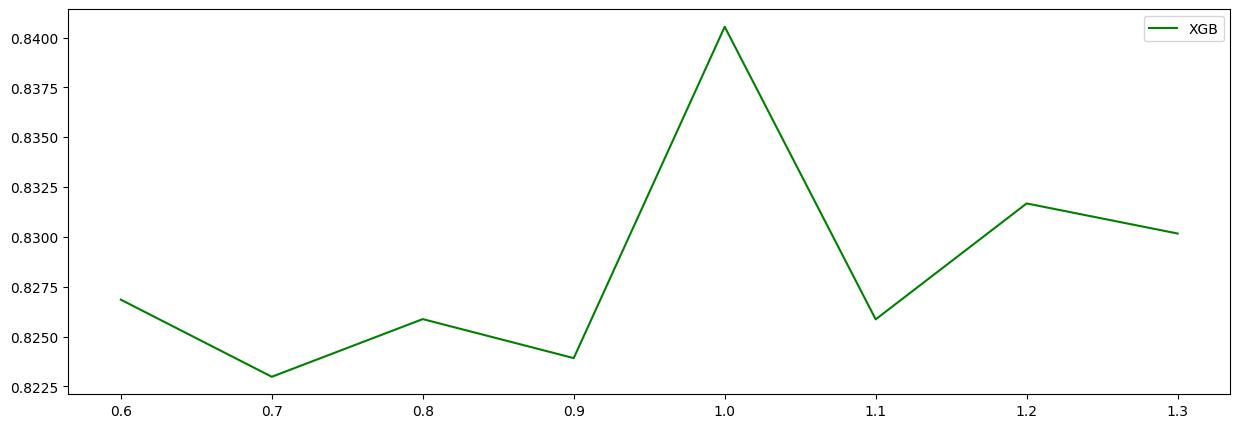

0.9999999999999999 0.8405388887279492


In [ ]:
# 继续细化L2正则项的参数:reg_lambda
num = []
rs = []
for i in np.arange(0.6, 1.4, 0.1):
    reg = XGBRegressor(
        n_estimators=n_estimators,
        random_state=42,
        learning_rate=learning_rate,
        reg_lambda=i,
    ).fit(x_train, ln_y_train)
    num.append(i)
    rs.append(cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean())
plt.figure(figsize=(15, 5))
plt.plot(num, rs, c="green", label="XGB")
plt.legend()
plt.show()

print(num[rs.index(max(rs))], max(rs))
reg_lambda = num[rs.index(max(rs))]

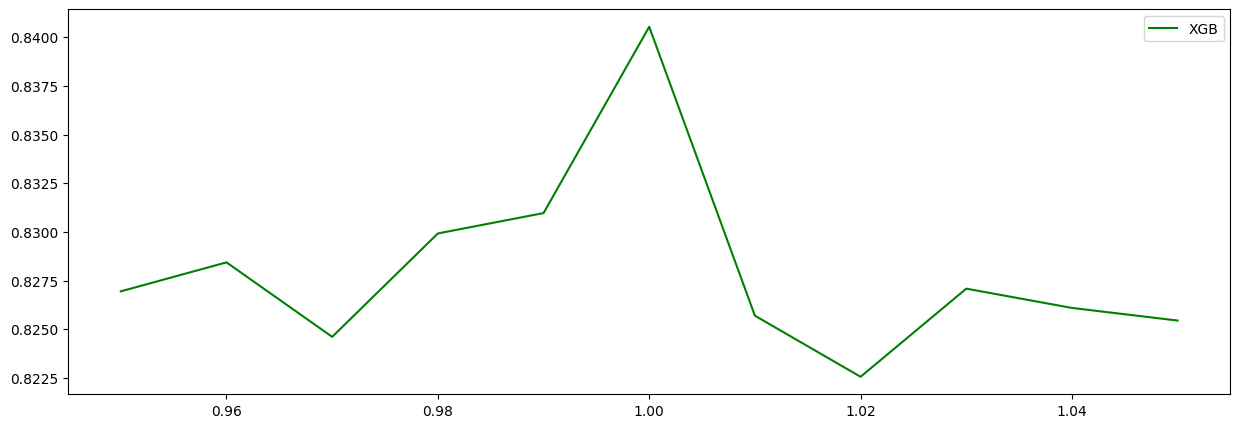

1.0 0.8405388887279492


In [ ]:
# 继续细化L2正则项的参数:reg_lambda
num = []
rs = []
for i in np.arange(0.95, 1.05, 0.01):
    reg = XGBRegressor(
        n_estimators=n_estimators,
        random_state=42,
        learning_rate=learning_rate,
        reg_lambda=i,
    ).fit(x_train, ln_y_train)
    num.append(i)
    rs.append(
        cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean()
    )
plt.figure(figsize=(15, 5))
plt.plot(num, rs, c="green", label="XGB")
plt.legend()
plt.show()

print(num[rs.index(max(rs))], max(rs))
reg_lambda = num[rs.index(max(rs))]

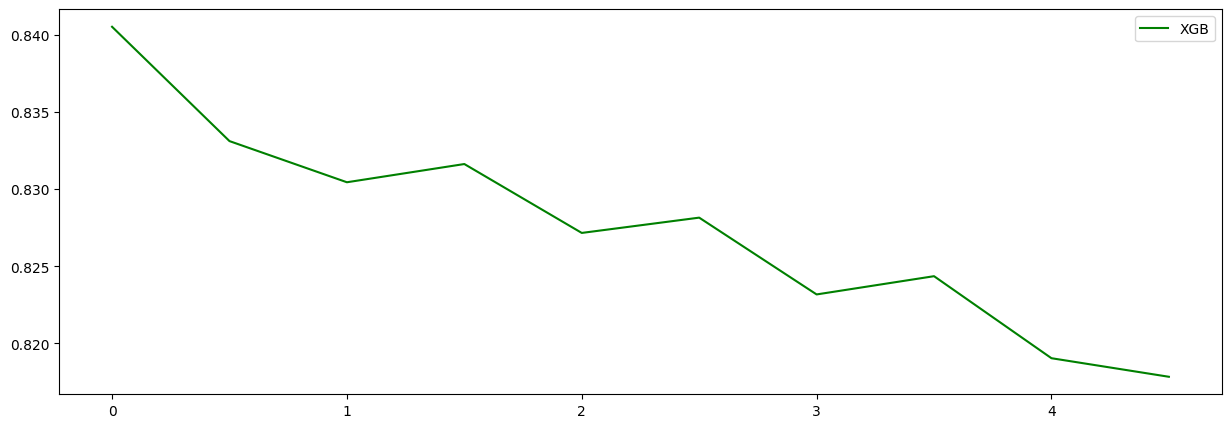

0.0 0.8405388887279492


In [ ]:
# L1正则项的参数:reg_alpha
num = []
rs = []
for i in np.arange(0, 5, 0.5):
    reg = XGBRegressor(
        n_estimators=n_estimators, random_state=42, learning_rate=learning_rate, reg_alpha=i
    ).fit(x_train, ln_y_train)
    num.append(i)
    rs.append(cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean())
plt.figure(figsize=(15, 5))
plt.plot(num, rs, c="green", label="XGB")
plt.legend()
plt.show()
print(num[rs.index(max(rs))], max(rs))
reg_alpha = num[rs.index(max(rs))]

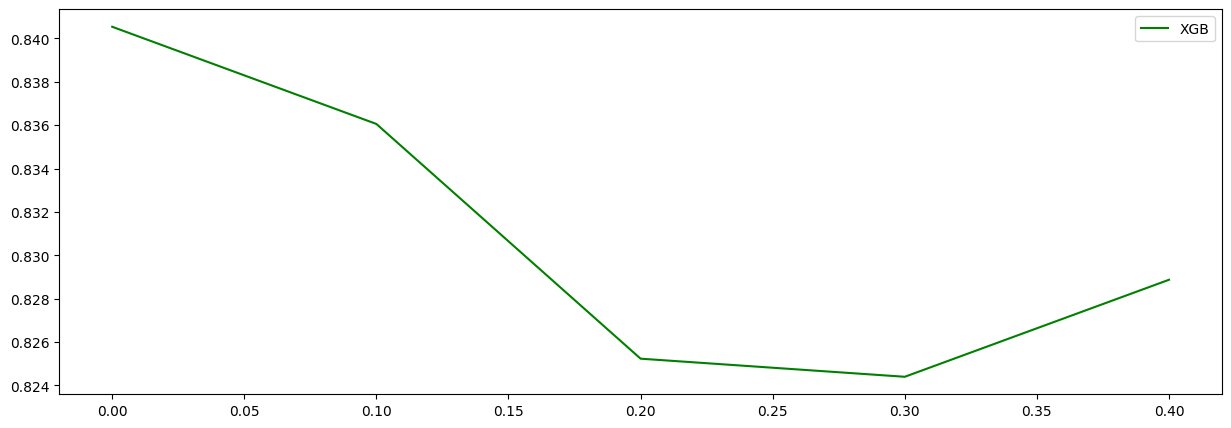

0.0 0.8405388887279492


In [ ]:
# 继续细化L1正则项的参数:reg_alpha
num = []
rs = []
for i in np.arange(0, 0.5, 0.1):
    reg = XGBRegressor(
        n_estimators=n_estimators, random_state=42, learning_rate=learning_rate, reg_alpha=i
    ).fit(x_train, ln_y_train)
    num.append(i)
    rs.append(cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean())
plt.figure(figsize=(15, 5))
plt.plot(num, rs, c="green", label="XGB")
plt.legend()
plt.show()
print(num[rs.index(max(rs))], max(rs))
reg_alpha = num[rs.index(max(rs))]

In [ ]:
# 验证模型效果是否提高了？
# 调整 l2 正则项
reg = XGBRegressor(
    n_estimators=n_estimators,
    random_state=42,
    learning_rate=learning_rate,
    reg_lambda=reg_lambda,
    n_jobs=-1,
).fit(x_train, ln_y_train)
cross_val_score(reg, x_train, ln_y_train, cv=cv).mean()

0.9065316399929598

In [ ]:
# 调整 l1 正则项
reg = XGBRegressor(
    n_estimators=n_estimators,
    random_state=42,
    learning_rate=learning_rate,
    reg_alpha=reg_alpha,
    n_jobs=-1,
).fit(x_train, ln_y_train)
cross_val_score(reg, x_train, ln_y_train, cv=cv).mean()

0.9065316399929598

> 两正则参数均采取默认值

#### 剪枝

> 作为天生过拟合的模型，XGBoost应用的核心之一就是减轻过拟合带来的影响。作为树模型，减轻过拟合的方式主要是靠对决策树剪枝来降低模型的复杂度，以求降低方差。

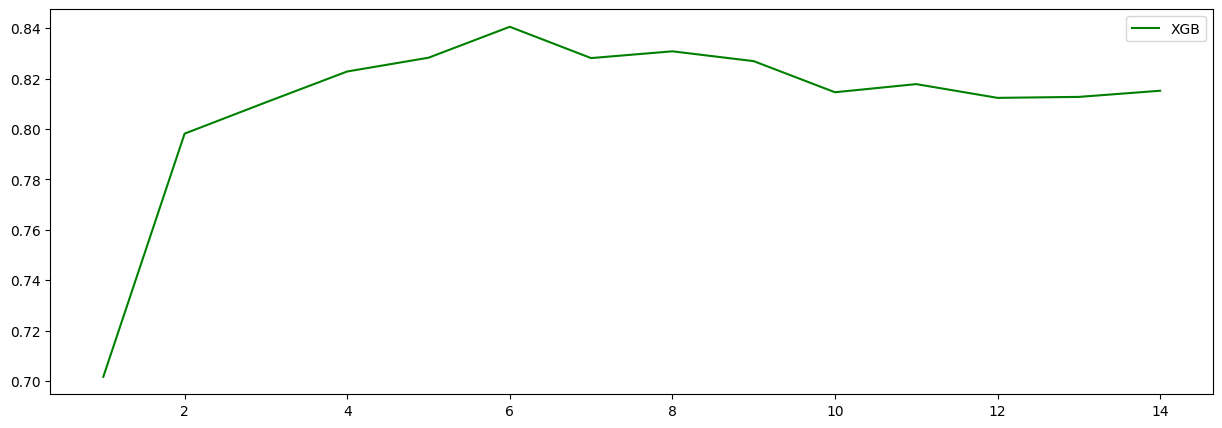

6 0.8405388887279492


In [ ]:
# 树的最大深度:max_depth
num = []
rs = []
for i in np.arange(1, 15, 1):
    reg = XGBRegressor(
        n_estimators=n_estimators,
        random_state=42,
        learning_rate=learning_rate,
        # reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        max_depth=i,
        n_jobs=-1,
    ).fit(x_train, ln_y_train)
    num.append(i)
    rs.append(cross_val_score(reg, x_train, ln_y_train, cv=cv, scoring=r2_scorer).mean())
plt.figure(figsize=(15, 5))
plt.plot(num, rs, c="green", label="XGB")
plt.legend()
plt.show()
print(num[rs.index(max(rs))], max(rs))
max_depth = num[rs.index(max(rs))]

> 分析发现仅调整学习率提高了模型表现，其他参数默认值即为最优参数。

#### 调参前后模型在测试集上的表现

##### Price 不取对数

In [ ]:
model = XGBRegressor()
y_pred = model.fit(x_train, y_train).predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"the mse is : {mse}")
print(f"the rmse is : {rmse}")
print(f"the mae is : {mae}")
print(f"the r2 is : {r2}")

the mse is : 79126616.0
the rmse is : 8895.314453125
the mae is : 4637.61865234375
the r2 is : 0.8933993419696933


##### Price 取对数

In [ ]:
model = XGBRegressor()
ln_y_pred = model.fit(x_train, ln_y_train).predict(x_test)
y_pred = np.exp(ln_y_pred) - 1

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"the mse is : {mse}")
print(f"the rmse is : {rmse}")
print(f"the mae is : {mae}")
print(f"the r2 is : {r2}")

the mse is : 71798280.0
the rmse is : 8473.38671875
the mae is : 4406.52978515625
the r2 is : 0.9032722049234191


In [ ]:
model = XGBRegressor()
ln_y_pred = model.fit(x_train, np.log1p(y_train + 1)).predict(x_test)
y_pred = np.expm1(ln_y_pred) - 1

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"the mse is : {mse}")
print(f"the rmse is : {rmse}")
print(f"the mae is : {mae}")
print(f"the r2 is : {r2}")

the mse is : 71798040.0
the rmse is : 8473.3720703125
the mae is : 4406.52294921875
the r2 is : 0.9032725256134775


##### 取对数 + 调参

> 效果还不如不调，:<

In [ ]:
model = XGBRegressor(
    learning_rate=learning_rate,
)
ln_y_pred = model.fit(x_train, ln_y_train).predict(x_test)
y_pred = np.exp(ln_y_pred) - 1

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"the mse is : {mse}")
print(f"the rmse is : {rmse}")
print(f"the mae is : {mae}")
print(f"the r2 is : {r2}")

the mse is : 78236072.0
the rmse is : 8845.115234375
the mae is : 4405.60107421875
the r2 is : 0.8945990973281046


### 模型融合

In [ ]:
from sklearn.model_selection import GridSearchCV


def build_model_xgb(x_train, y_train):
    model = XGBRegressor(
        n_estimators=100,
        objective="reg:squarederror",
        enable_categorical=True,
        force_col_wise=True,
    )
    model.fit(x_train, y_train)
    return model


def build_model_random(x_train, y_train):
    model = RandomForestRegressor()
    model.fit(x_train, y_train)
    return model


def build_model_lgb(x_train, y_train):
    estimator = LGBMRegressor(n_estimators=100, force_col_wise=True)
    param_grid = {
        "learning_rate": [0.01, 0.05, 0.1],
    }
    gbm = GridSearchCV(estimator, param_grid)
    gbm.fit(x_train, y_train)
    return gbm


def build_model_lr(x_train, y_train):
    reg_model = LinearRegression()
    reg_model.fit(x_train, y_train)
    return reg_model

In [ ]:
df = reduce_mem_usage(pd.read_csv("data_for_lr.csv"))
df.dropna(inplace=True)
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Price", axis=1), df.Price, test_size=0.3, random_state=42
)
y_train = np.log1p(y_train + 1)

Memory usage of dataframe is 2485088.00 MB
Memory usage after optimization is: 1724069.00 MB
Decreased by 30.6%


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)


print("predict XGB...")
model_xgb = build_model_xgb(x_train, y_train)
val_xgb = model_xgb.predict(x_val)
subA_xgb = model_xgb.predict(x_test)

print("predict lgb...")
model_lgb = build_model_lgb(x_train, y_train)
val_lgb = model_lgb.predict(x_val)
subA_lgb = model_lgb.predict(x_test)

print("predict random...")
model_random = build_model_random(x_train, y_train)
val_random = model_random.predict(x_val)
subA_random = model_random.predict(x_test)

predict XGB...


predict lgb...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 6087, number of used features: 48
[LightGBM] [Info] Start training from score 10.242211
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 6087, number of used features: 48
[LightGBM] [Info] Start training from score 10.247354
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 6087, number of used features: 48
[LightGBM] [Info] Start training from score 10.239124
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 6087, number of used features: 48
[Li

In [ ]:
train_lgb_pred = model_lgb.predict(x_train)
train_xgb_pred = model_xgb.predict(x_train)
train_random_pred = model_random.predict(x_train)

Strak_X_train = pd.DataFrame()
Strak_X_train["Method_1"] = train_lgb_pred
Strak_X_train["Method_2"] = train_xgb_pred
Strak_X_train["Method_3"] = train_random_pred

Strak_X_val = pd.DataFrame()
Strak_X_val["Method_1"] = val_lgb
Strak_X_val["Method_2"] = val_xgb
Strak_X_val["Method_3"] = val_random

Strak_X_test = pd.DataFrame()
Strak_X_test["Method_1"] = subA_lgb
Strak_X_test["Method_2"] = subA_xgb
Strak_X_test["Method_3"] = subA_random

In [ ]:
Strak_X_test.head()

,Method_1,Method_2,Method_3
0,10.257897,10.334923,10.330273
1,10.813372,10.817518,10.867994
2,10.917962,11.017177,10.917817
3,9.441589,9.417512,9.578024
4,9.106382,9.124721,9.231435


In [ ]:
model_lr_Stacking = build_model_lr(Strak_X_train, y_train)
## 训练集
train_pre_Stacking = model_lr_Stacking.predict(Strak_X_train)
print("MAE of Stacking-LR:", mean_absolute_error(y_train, train_pre_Stacking))

## 验证集
val_pre_Stacking = model_lr_Stacking.predict(Strak_X_val)
print("MAE of Stacking-LR:", mean_absolute_error(y_val, val_pre_Stacking))

## 预测集
print("Predict Stacking-LR...")
subA_Stacking = model_lr_Stacking.predict(Strak_X_test)

MAE of Stacking-LR: 0.040875907048872895
MAE of Stacking-LR: 0.1355687777608931
Predict Stacking-LR...


In [ ]:
subA_Stacking = np.expm1(subA_Stacking) - 1
subA_lgb = np.expm1(subA_lgb) - 1
subA_xgb = np.expm1(subA_xgb) - 1
subA_random = np.expm1(subA_random) - 1

result = dict()

result['Stacking'] = r2_score(y_test, subA_Stacking)
result['XGB'] = r2_score(y_test, subA_xgb)
result['LGB'] = r2_score(y_test, subA_lgb)
result['Random'] = r2_score(y_test, subA_random)

result = pd.DataFrame(result, index=["r2_score"])
result

,Stacking,XGB,LGB,Random
r2_score,0.868951,0.877155,0.864647,0.858419


> 不太行，不如 XGB 单独跑。

### 最终方案

#### 数据分析 & 特征提取
> 数字特征
- Engine 中提取发动机容量
- 提取每百公里油耗
- 处理行驶里程数的缺失值
    - '- / -' 为新车，用 0 替换
    - 将行驶里程未知的二手车抛弃
    - 将行驶里程未知的新车的行驶里程用 0 替换
- CylindersinEngine 中提取气缸数量
- 处理 Seats 缺失值
    - 存在部分数据 Seats 错位至 Doors 列，将 Seats 数据从 Doors 中提取出来
- 抛弃价格位置的行 nan 与 'POA'
- 借助 `gpt-3.5-turbo` 补充缺失的“发动机容量”，“油耗（每百公里升数）”，“发动机中气缸数量”，“汽车的门数”，“汽车的座位数”
- 利用箱线图去除 Engine, FuelConsumption, Kilometres 中的异常值
- 将 Year 转化为汽车的出厂时长 Age
- 根据训练集构建品牌(Brand)的销售统计量
    - brand_amount
    - brand_price_max
    - brand_price_min
    - brand_price_sum
    - brand_price_std
    - brand_price_average
- 归一化 Engine, FuelConsumption, Kilometres, CylindersinEngine 以及构建的销售统计量

> 类型特征
- 从 Location 中提取洲信息，抛弃城市信息
- 抛弃过于离散的类型特征 Title, Model, Car/SUV, ColourExtInt, Brand
- 对剩余的类型特征进行独热编码

#### 模型调参

1. 对比各模型发现 XGB 表现最好，选取 XGB 进行调参
    - n_estimators = 100
    - subsample = 1.0
    - learning_rate = 0.25555555555555554 (测试集表现不如默认值)
    - booster = "gbtree"
    - reg_lambda = 1.0 reg_alpha = 0.0
    - max_depth = 6
    > 调了半天发现默认值表现最好 :<

2. 训练时对 Price 取对数
3. 计算 R2 时，对预测的值做反变换再参与计算

#### 模型融合

> 结论是不如 XGB 自己单独 solo

In [510]:
df = reduce_mem_usage(pd.read_csv("data_for_lr.csv"))

Memory usage of dataframe is 2485088.00 MB
Memory usage after optimization is: 1724069.00 MB
Decreased by 30.6%


In [511]:
df.dropna(inplace=True)
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Price", axis=1), df.Price, test_size=0.3, random_state=42
)

model = XGBRegressor(
    n_estimators=100,
    subsample=1.0,
    booster="gbtree",
    max_depth=6,
)
ln_y_pred = model.fit(x_train, np.log1p(y_train + 1)).predict(x_test)
y_pred = np.expm1(ln_y_pred) - 1

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"the mse is : {mse}")
print(f"the rmse is : {rmse}")
print(f"the mae is : {mae}")
print(f"the r2 is : {r2}")

the mse is : 71798040.0
the rmse is : 8473.3720703125
the mae is : 4406.52294921875
the r2 is : 0.9032725256134775
